In [5]:
import pandas as pd
import numpy as np
import re
import datetime as dt
from datetime import timedelta, datetime, time
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy.stats import entropy


Matplotlib is building the font cache; this may take a moment.


In [ ]:
path = '/content/drive/MyDrive/Aviator/Data1/bd_pseudo_1.csv'
data = pd.read_csv(path)
print(data)
t = 0
print(len(data))
t0 = int(input("Maximo: "))
tamanho_data = len(data)

odd = []
horario = []
odd_ajustada = []

while t <= t0:
    if t < tamanho_data:
        value = data['odd'][t]
        if isinstance(value, float):
            odd.append(np.nan)  # or any other value to represent missing data
        else:
            aux = value.split('\n\n')
            a1 = aux[0].replace(')I', '')
            a2 = a1.replace(')', '')
            a3 = a2.replace('|', '1')
            a4 = a3.replace('?', '7')
            a5 = re.sub('[^0-9.]', '', a4)
            odd.append(float(a5))
        horario.append(data['hora_criacao'][t])

    t += 1

for name in odd:
    ajuste = float(name - 1.25)
    odd_ajustada.append(ajuste)

horas = []
minutos = []
segundos = []
for item in horario:
    dt = datetime.strptime(item, "%a %b %d %H:%M:%S %Y")
    horas.append(dt.hour)
    minutos.append(dt.minute)
    segundos.append(dt.second)

data1 = pd.DataFrame({'Odd_ajustada': odd, 'hora': horas, 'minutos': minutos, 'segundos': segundos, 'horario': horario})

###Data final
#data = dados_filtrados
data = data1

# Verificar se existem valores NaN na coluna "Odd_ajustada"
has_nan = data['Odd_ajustada'].isna().any()
if has_nan:
    print("Existem valores NaN na coluna 'Odd_ajustada'.")
else:
    print("Não existem valores NaN na coluna 'Odd_ajustada'.")


          id    odd              hora_criacao apostadores
0          0  13.89  Sat May 27 00:28:06 2023        1650
1          1   1.44  Sat May 27 00:28:18 2023       22211
2          2   3.39  Sat May 27 00:28:42 2023        1751
3          3   1.27  Sat May 27 00:28:56 2023        1950
4          4   5.16  Sat May 27 00:29:26 2023        2086
...      ...    ...                       ...         ...
37852  37855   1.53  Fri Oct 20 23:00:27 2023           
37853  37856   1.36  Fri Oct 20 23:00:45 2023        181
37854  37857   1.00  Fri Oct 20 23:00:59 2023       1882
37855  37858   2.17  Fri Oct 20 23:01:20 2023          1
37856  37859   2.12  Fri Oct 20 23:01:46 2023           

[37857 rows x 4 columns]
37857
Maximo: 37857
Não existem valores NaN na coluna 'Odd_ajustada'.


In [ ]:
data

,Odd_ajustada,hora,minutos,segundos,horario
0,13.89,0,28,6,Sat May 27 00:28:06 2023
1,1.44,0,28,18,Sat May 27 00:28:18 2023
2,3.39,0,28,42,Sat May 27 00:28:42 2023
3,1.27,0,28,56,Sat May 27 00:28:56 2023
4,5.16,0,29,26,Sat May 27 00:29:26 2023
...,...,...,...,...,...
37852,1.53,23,0,27,Fri Oct 20 23:00:27 2023
37853,1.36,23,0,45,Fri Oct 20 23:00:45 2023
37854,1.00,23,0,59,Fri Oct 20 23:00:59 2023
37855,2.17,23,1,20,Fri Oct 20 23:01:20 2023


In [ ]:
data1 = data

In [ ]:
# Crie colunas separadas para o dia, mês e ano
data['dia'] = pd.to_datetime(data['horario']).dt.day
data['mes'] = pd.to_datetime(data['horario']).dt.month
data['ano'] = pd.to_datetime(data['horario']).dt.year

# Suponhamos que sua coluna de data e hora seja chamada 'entrada'
data['horario'] = pd.to_datetime(data['horario']).dt.time

t = len(data)
total = []
for i in range(0,t):
  #print(data['hora'][i], data['minutos'][i], data['segundos'][i])
  hour = data['hora'][i]*3600
  minutes = data['minutos'][i]*60
  soma = hour + minutes + data['segundos'][i]
  total.append(soma)
total = pd.DataFrame(total, columns = ['total_segundos'])
print(total)
data = pd.concat([data, total], axis = 1)


       total_segundos
0                1686
1                1698
2                1722
3                1736
4                1766
...               ...
35912           66003
35913           66016
35914           66049
35915           66063
35916           66082

[35917 rows x 1 columns]


In [ ]:
data2 = data
data

,Odd_ajustada,hora,minutos,segundos,horario,dia,mes,ano,total_segundos
0,13.89,0,28,6,00:28:06,27,5,2023,1686
1,1.44,0,28,18,00:28:18,27,5,2023,1698
2,3.39,0,28,42,00:28:42,27,5,2023,1722
3,1.27,0,28,56,00:28:56,27,5,2023,1736
4,5.16,0,29,26,00:29:26,27,5,2023,1766
...,...,...,...,...,...,...,...,...,...
35912,1.62,18,20,3,18:20:03,19,10,2023,66003
35913,1.08,18,20,16,18:20:16,19,10,2023,66016
35914,5.82,18,20,49,18:20:49,19,10,2023,66049
35915,1.24,18,21,3,18:21:03,19,10,2023,66063


In [ ]:
data = pd.DataFrame()
data['Odd_ajustada'] = data2['Odd_ajustada']
data['horario'] = data2['horario']
data['total_segundos']  = data2['total_segundos']

# Crie as colunas "entrada" e "saida" deslocando a coluna "horario" para cima
new_data = pd.DataFrame()
new_data['saida'] = data['total_segundos']
new_data['entrada'] = data['total_segundos'].shift(1)

new_data = new_data.drop(new_data.index[0])
# Visualize o DataFrame new_data
print(new_data)

data = pd.concat([data, new_data], axis = 1)

data = data.drop(data.index[0])

       saida  entrada
1       1698   1686.0
2       1722   1698.0
3       1736   1722.0
4       1766   1736.0
5       1790   1766.0
...      ...      ...
35912  66003  65986.0
35913  66016  66003.0
35914  66049  66016.0
35915  66063  66049.0
35916  66082  66063.0

[35916 rows x 2 columns]


In [ ]:
data

,Odd_ajustada,horario,total_segundos,saida,entrada
1,1.44,00:28:18,1698,1698.0,1686.0
2,3.39,00:28:42,1722,1722.0,1698.0
3,1.27,00:28:56,1736,1736.0,1722.0
4,5.16,00:29:26,1766,1766.0,1736.0
5,2.65,00:29:50,1790,1790.0,1766.0
...,...,...,...,...,...
35912,1.62,18:20:03,66003,66003.0,65986.0
35913,1.08,18:20:16,66016,66016.0,66003.0
35914,5.82,18:20:49,66049,66049.0,66016.0
35915,1.24,18:21:03,66063,66063.0,66049.0


In [ ]:
data2

,Odd_ajustada,hora,minutos,segundos,horario,dia,mes,ano,total_segundos
0,13.89,0,28,6,00:28:06,27,5,2023,1686
1,1.44,0,28,18,00:28:18,27,5,2023,1698
2,3.39,0,28,42,00:28:42,27,5,2023,1722
3,1.27,0,28,56,00:28:56,27,5,2023,1736
4,5.16,0,29,26,00:29:26,27,5,2023,1766
...,...,...,...,...,...,...,...,...,...
35912,1.62,18,20,3,18:20:03,19,10,2023,66003
35913,1.08,18,20,16,18:20:16,19,10,2023,66016
35914,5.82,18,20,49,18:20:49,19,10,2023,66049
35915,1.24,18,21,3,18:21:03,19,10,2023,66063


In [ ]:
# Normalize os dados
scaler = StandardScaler()
X = data[['entrada']].values
y = data[['saida']].values
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Divida os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie o modelo de rede neural
model = keras.Sequential([
    keras.layers.LSTM(128, activation='relu', input_shape=(1, 1), kernel_regularizer=l2(0.001)),
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])


# Compile o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Treine o modelo
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Avalie o modelo no conjunto de teste
loss = model.evaluate(X_test, y_test)
print(f"Erro Médio Quadrático no conjunto de teste: {loss}")

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test)

# Desnormalize as previsões
y_pred = scaler.inverse_transform(y_pred)


Epoch 1/50
449/449 [==============================] - 8s 9ms/step - loss: 0.0477 - mean_squared_error: 0.0463
Epoch 2/50
449/449 [==============================] - 3s 8ms/step - loss: 0.0059 - mean_squared_error: 0.0051
Epoch 3/50
449/449 [==============================] - 3s 7ms/step - loss: 0.0057 - mean_squared_error: 0.0050
Epoch 4/50
449/449 [==============================] - 3s 6ms/step - loss: 0.0057 - mean_squared_error: 0.0052
Epoch 5/50
449/449 [==============================] - 4s 9ms/step - loss: 0.0056 - mean_squared_error: 0.0051
Epoch 6/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0055 - mean_squared_error: 0.0052
Epoch 7/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0055 - mean_squared_error: 0.0052
Epoch 8/50
449/449 [==============================] - 2s 5ms/step - loss: 0.0056 - mean_squared_error: 0.0053
Epoch 9/50
449/449 [==============================] - 2s 4ms/step - loss: 0.0054 - mean_squared_error: 0.0052
Epoch 10/5

In [ ]:
k = 0
array = []
print(data['entrada'].tail(1).reset_index(drop = True).iloc[0])
new_entry = pd.DataFrame()
new_entry['entrada'] = data['entrada'].tail(1).reset_index(drop = True)

while k <= 150:

  new_entry = new_entry[['entrada']].values
  new_entry = scaler.fit_transform(new_entry)

  y_pred_new = model.predict(new_entry)

  print(y_pred_new)

  y_pred_hor = scaler.inverse_transform(y_pred_new)

  print(y_pred_hor)
  # Converter de segundos para o formato de horário
  source = y_pred_hor[:, 0] + 27.5
  y_pred_horario = pd.to_datetime(source, unit='s').time
  y_pred_horario_str = [horario.strftime('%H:%M:%S') for horario in y_pred_horario]

  y_pred_horario


  # Obtenha o valor do array
  horario_predito = y_pred_horario[0]

  # Converta o valor para um objeto de tempo
  horario_obj = time(
      horario_predito.hour,  # Extraia as horas
      horario_predito.minute,  # Extraia os minutos
      horario_predito.second,  # Extraia os segundos
      horario_predito.microsecond  # Extraia os microssegundos (opcional)
  )

  # Agora você tem o horário em um formato de objeto de tempo
  print(horario_obj)
  array.append(y_pred_horario_str)

  new_entry = pd.DataFrame([source], columns = ['entrada'])
  k += 1

66063.0
1/1 [==============================] - 0s 20ms/step
[[-0.01620807]]
[[66062.984]]
18:21:30.484375
1/1 [==============================] - 0s 19ms/step
[[-0.01620807]]
[[66090.47]]
18:21:57.968750
1/1 [==============================] - 0s 21ms/step
[[-0.01620807]]
[[66117.95]]
18:22:25.453125
1/1 [==============================] - 0s 18ms/step
[[-0.01620807]]
[[66145.44]]
18:22:52.937500
1/1 [==============================] - 0s 18ms/step
[[-0.01620807]]
[[66172.92]]
18:23:20.421875
1/1 [==============================] - 0s 18ms/step
[[-0.01620807]]
[[66200.41]]
18:23:47.906250
1/1 [==============================] - 0s 21ms/step
[[-0.01620807]]
[[66227.89]]
18:24:15.390625
1/1 [==============================] - 0s 18ms/step
[[-0.01620807]]
[[66255.375]]
18:24:42.875000
1/1 [==============================] - 0s 20ms/step
[[-0.01620807]]
[[66282.86]]
18:25:10.359375
1/1 [==============================] - 0s 24ms/step
[[-0.01620807]]
[[66310.34]]
18:25:37.843750
1/1 [===============

In [ ]:
data1

,Odd_ajustada,hora,minutos,segundos,horario,dia,mes,ano
0,13.89,0,28,6,00:28:06,27,5,2023
1,1.44,0,28,18,00:28:18,27,5,2023
2,3.39,0,28,42,00:28:42,27,5,2023
3,1.27,0,28,56,00:28:56,27,5,2023
4,5.16,0,29,26,00:29:26,27,5,2023
...,...,...,...,...,...,...,...,...
35912,1.62,18,20,3,18:20:03,19,10,2023
35913,1.08,18,20,16,18:20:16,19,10,2023
35914,5.82,18,20,49,18:20:49,19,10,2023
35915,1.24,18,21,3,18:21:03,19,10,2023


In [ ]:
data = pd.DataFrame()
data['Odd_ajustada'] = data1['Odd_ajustada']
data['horario'] = data1['horario']
data['hora'] = data1['hora']

In [ ]:
data5 = data

In [ ]:
geral_cat = []
for name in data['Odd_ajustada']:
  #print(name)
  if name < 1.05:
    geral_cat.append(1)
  elif name >= 1.05 and name < 1.15:
    geral_cat.append(2)
  elif name >= 1.15 and name < 1.3:
    geral_cat.append(3)
  elif name >= 1.3 and name < 1.45:
    geral_cat.append(4)
  elif name >= 1.45 and name < 1.7:
    geral_cat.append(5)
  elif name >= 1.7 and name < 2.1:
    geral_cat.append(6)
  elif name >= 2.1 and name < 2.6:
    geral_cat.append(7)
  elif name >= 2.6 and name < 3.5:
    geral_cat.append(8)
  elif name >= 3.5 and name < 5:
    geral_cat.append(9)
  elif name >= 5 and name < 10:
    geral_cat.append(10)
  elif name >= 10:
    geral_cat.append(11)
print(len(geral_cat))
geral_cat1 = pd.DataFrame([geral_cat]).T
geral_cat1.columns = ['Odd_Categoria']
data = pd.concat([data, geral_cat1], axis = 1)

data['Odd_Categoria'].describe()

37857


count    37857.000000
mean         6.114536
std          3.090147
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: Odd_Categoria, dtype: float64

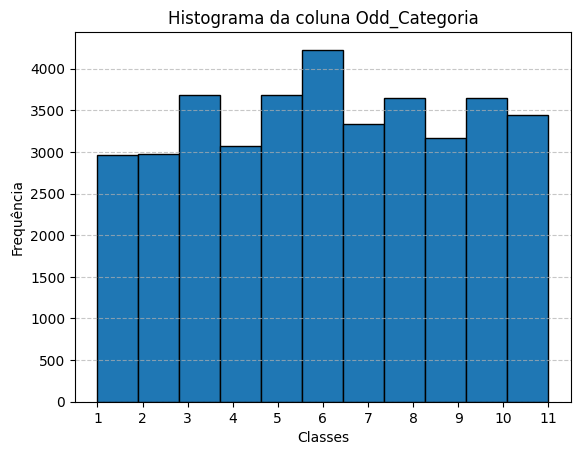

In [ ]:
# Configurar o histograma
plt.hist(data['Odd_Categoria'], bins=11, edgecolor='k')  # O número de bins deve corresponder ao número de classes (12 no seu caso)
plt.title('Histograma da coluna Odd_Categoria')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(range(1, 12))  # Rótulos do eixo x de 1 a 12
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o histograma
plt.show()


In [ ]:
data

,Odd_ajustada,hora,minutos,segundos,horario,Odd_Categoria
0,13.89,0,28,6,Sat May 27 00:28:06 2023,11
1,1.44,0,28,18,Sat May 27 00:28:18 2023,4
2,3.39,0,28,42,Sat May 27 00:28:42 2023,8
3,1.27,0,28,56,Sat May 27 00:28:56 2023,3
4,5.16,0,29,26,Sat May 27 00:29:26 2023,10
...,...,...,...,...,...,...
37352,1.64,18,47,42,Fri Oct 20 18:47:42 2023,5
37353,1.25,18,48,2,Fri Oct 20 18:48:02 2023,3
37354,1.02,18,48,15,Fri Oct 20 18:48:15 2023,1
37355,4.92,18,48,50,Fri Oct 20 18:48:50 2023,9


In [ ]:
# Crie as colunas "entrada" e "saida" deslocando a coluna "horario" para cima
new_data = pd.DataFrame()
new_data['odd_saida'] = data['Odd_Categoria']
new_data['odd_eentrada'] = data['Odd_Categoria'].shift(1)

new_data = new_data.drop(new_data.index[0])
# Visualize o DataFrame new_data
print(new_data)

data = pd.concat([data, new_data], axis = 1)

data = data.drop(data.index[0])

       odd_saida  odd_eentrada
1              4          11.0
2              8           4.0
3              3           8.0
4             10           3.0
5              8          10.0
...          ...           ...
37852          5          11.0
37853          4           5.0
37854          1           4.0
37855          7           1.0
37856          7           7.0

[37856 rows x 2 columns]


In [ ]:
data

,Odd_ajustada,hora,minutos,segundos,horario,Odd_Categoria,odd_saida,odd_eentrada
1,1.44,0,28,18,Sat May 27 00:28:18 2023,4,4.0,11.0
2,3.39,0,28,42,Sat May 27 00:28:42 2023,8,8.0,4.0
3,1.27,0,28,56,Sat May 27 00:28:56 2023,3,3.0,8.0
4,5.16,0,29,26,Sat May 27 00:29:26 2023,10,10.0,3.0
5,2.65,0,29,50,Sat May 27 00:29:50 2023,8,8.0,10.0
...,...,...,...,...,...,...,...,...
37852,1.53,23,0,27,Fri Oct 20 23:00:27 2023,5,5.0,11.0
37853,1.36,23,0,45,Fri Oct 20 23:00:45 2023,4,4.0,5.0
37854,1.00,23,0,59,Fri Oct 20 23:00:59 2023,1,1.0,4.0
37855,2.17,23,1,20,Fri Oct 20 23:01:20 2023,7,7.0,1.0


In [ ]:
data['odd_categoria_media_movel5'] = data['odd_eentrada'].rolling(window=5).mean()
data['odd_categoria_media_movel10'] = data['odd_eentrada'].rolling(window=10).mean()
data['odd_categoria_media_movel20'] = data['odd_eentrada'].rolling(window=20).mean()
data['odd_categoria_media_movel40'] = data['odd_eentrada'].rolling(window=40).mean()
data['odd_categoria_media_movel80'] = data['odd_eentrada'].rolling(window=80).mean()
data['odd_categoria_media_movel160'] = data['odd_eentrada'].rolling(window=160).mean()
data['odd_categoria_media_movel320'] = data['odd_eentrada'].rolling(window=320).mean()
data['odd_categoria_media_movel640'] = data['odd_eentrada'].rolling(window=640).mean()

data = data.fillna(data.mean())  # Preencher com a média da coluna

# Estatísticas Descritivas
data['odd_mediana5'] = data['odd_eentrada'].rolling(window=5).median()
data['odd_mediana10'] = data['odd_eentrada'].rolling(window=10).median()
data['odd_mediana20'] = data['odd_eentrada'].rolling(window=20).median()
data['odd_mediana40'] = data['odd_eentrada'].rolling(window=40).median()
data['odd_mediana80'] = data['odd_eentrada'].rolling(window=80).median()
data['odd_mediana160'] = data['odd_eentrada'].rolling(window=160).median()
data['odd_mediana320'] = data['odd_eentrada'].rolling(window=320).median()
data['odd_mediana640'] = data['odd_eentrada'].rolling(window=640).median()

data['odd_desvio_padrao5'] = data['odd_eentrada'].rolling(window=5).std()
data['odd_desvio_padrao10'] = data['odd_eentrada'].rolling(window=10).std()
data['odd_desvio_padrao20'] = data['odd_eentrada'].rolling(window=20).std()
data['odd_desvio_padrao40'] = data['odd_eentrada'].rolling(window=40).std()
data['odd_desvio_padrao80'] = data['odd_eentrada'].rolling(window=80).std()
data['odd_desvio_padrao160'] = data['odd_eentrada'].rolling(window=160).std()
data['odd_desvio_padrao320'] = data['odd_eentrada'].rolling(window=320).std()
data['odd_desvio_padrao640'] = data['odd_eentrada'].rolling(window=640).std()

data['odd_min5'] = data['odd_eentrada'].rolling(window=5).min()
data['odd_min10'] = data['odd_eentrada'].rolling(window=10).min()
data['odd_min20'] = data['odd_eentrada'].rolling(window=20).min()
data['odd_min40'] = data['odd_eentrada'].rolling(window=40).min()
data['odd_min80'] = data['odd_eentrada'].rolling(window=80).min()

data['odd_max5'] = data['odd_eentrada'].rolling(window=5).max()
data['odd_max10'] = data['odd_eentrada'].rolling(window=10).max()
data['odd_max20'] = data['odd_eentrada'].rolling(window=20).max()
data['odd_max40'] = data['odd_eentrada'].rolling(window=40).max()
data['odd_max80'] = data['odd_eentrada'].rolling(window=80).max()

# Tendência de Média Móvel
data['tendencia_media_movel5'] = data['odd_categoria_media_movel5'].diff()
data['tendencia_media_movel10'] = data['odd_categoria_media_movel10'].diff()
data['tendencia_media_movel20'] = data['odd_categoria_media_movel20'].diff()
data['tendencia_media_movel40'] = data['odd_categoria_media_movel40'].diff()
data['tendencia_media_movel80'] = data['odd_categoria_media_movel80'].diff()
data['tendencia_media_movel160'] = data['odd_categoria_media_movel160'].diff()
data['tendencia_media_movel320'] = data['odd_categoria_media_movel320'].diff()
data['tendencia_media_movel640'] = data['odd_categoria_media_movel640'].diff()

# Frequência de Categorias (assumindo que 'Odd_Categoria' é categórico)
data['categoria_frequencia5'] = data['odd_eentrada'].rolling(window=5).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia10'] = data['odd_eentrada'].rolling(window=10).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia20'] = data['odd_eentrada'].rolling(window=20).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia40'] = data['odd_eentrada'].rolling(window=40).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia80'] = data['odd_eentrada'].rolling(window=80).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia160'] = data['odd_eentrada'].rolling(window=160).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia320'] = data['odd_eentrada'].rolling(window=320).apply(lambda x: x.value_counts().idxmax())
data['categoria_frequencia640'] = data['odd_eentrada'].rolling(window=640).apply(lambda x: x.value_counts().idxmax())

data['entropia_rolling5'] = data['odd_eentrada'].rolling(window=5).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling10'] = data['odd_eentrada'].rolling(window=10).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling20'] = data['odd_eentrada'].rolling(window=20).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling40'] = data['odd_eentrada'].rolling(window=40).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling80'] = data['odd_eentrada'].rolling(window=80).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling160'] = data['odd_eentrada'].rolling(window=160).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling320'] = data['odd_eentrada'].rolling(window=320).apply(lambda x: entropy(x.value_counts(normalize=True)))
data['entropia_rolling640'] = data['odd_eentrada'].rolling(window=640).apply(lambda x: entropy(x.value_counts(normalize=True)))

# Correlações (exemplo com 'media_movel_segundo5')
data['correlacao_odd_categoria_media_movel5'] = data['odd_eentrada'].rolling(window=5).corr(data['odd_categoria_media_movel5'])
data['correlacao_odd_categoria_media_movel10'] = data['odd_eentrada'].rolling(window=10).corr(data['odd_categoria_media_movel10'])
data['correlacao_odd_categoria_media_movel20'] = data['odd_eentrada'].rolling(window=20).corr(data['odd_categoria_media_movel20'])
data['correlacao_odd_categoria_media_movel40'] = data['odd_eentrada'].rolling(window=40).corr(data['odd_categoria_media_movel40'])
data['correlacao_odd_categoria_media_movel80'] = data['odd_eentrada'].rolling(window=80).corr(data['odd_categoria_media_movel80'])
data['correlacao_odd_categoria_media_movel160'] = data['odd_eentrada'].rolling(window=160).corr(data['odd_categoria_media_movel160'])
data['correlacao_odd_categoria_media_movel320'] = data['odd_eentrada'].rolling(window=320).corr(data['odd_categoria_media_movel320'])
data['correlacao_odd_categoria_media_movel640'] = data['odd_eentrada'].rolling(window=640).corr(data['odd_categoria_media_movel640'])

data['correlacao_odd_categoria_media_movel5'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['correlacao_odd_categoria_media_movel10'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['correlacao_odd_categoria_media_movel20'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['correlacao_odd_categoria_media_movel40'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['correlacao_odd_categoria_media_movel80'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['correlacao_odd_categoria_media_movel160'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['correlacao_odd_categoria_media_movel320'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['correlacao_odd_categoria_media_movel640'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Contagem de repetições das categorias
data['categoria_contagem'] = data['odd_eentrada'].map(data['odd_eentrada'].value_counts())

# Tendência das Odds
data['odd_tendencia'] = data['odd_eentrada'].diff()

data['percentil25_rolling5'] = data['odd_eentrada'].rolling(window=5).quantile(0.25)
data['percentil25_rolling10'] = data['odd_eentrada'].rolling(window=10).quantile(0.25)
data['percentil25_rolling20'] = data['odd_eentrada'].rolling(window=20).quantile(0.25)
data['percentil25_rolling40'] = data['odd_eentrada'].rolling(window=40).quantile(0.25)
data['percentil25_rolling80'] = data['odd_eentrada'].rolling(window=80).quantile(0.25)
data['percentil25_rolling160'] = data['odd_eentrada'].rolling(window=160).quantile(0.25)
data['percentil25_rolling320'] = data['odd_eentrada'].rolling(window=320).quantile(0.25)
data['percentil25_rolling640'] = data['odd_eentrada'].rolling(window=640).quantile(0.25)

data['percentil75_rolling5'] = data['odd_eentrada'].rolling(window=5).quantile(0.75)
data['percentil75_rolling10'] = data['odd_eentrada'].rolling(window=10).quantile(0.75)
data['percentil75_rolling20'] = data['odd_eentrada'].rolling(window=20).quantile(0.75)
data['percentil75_rolling40'] = data['odd_eentrada'].rolling(window=40).quantile(0.75)
data['percentil75_rolling80'] = data['odd_eentrada'].rolling(window=80).quantile(0.75)
data['percentil75_rolling160'] = data['odd_eentrada'].rolling(window=160).quantile(0.75)
data['percentil75_rolling320'] = data['odd_eentrada'].rolling(window=320).quantile(0.75)
data['percentil75_rolling640'] = data['odd_eentrada'].rolling(window=640).quantile(0.75)

data['variancia_rolling5'] = data['odd_eentrada'].rolling(window=5).var()
data['variancia_rolling10'] = data['odd_eentrada'].rolling(window=10).var()
data['variancia_rolling20'] = data['odd_eentrada'].rolling(window=20).var()
data['variancia_rolling40'] = data['odd_eentrada'].rolling(window=40).var()
data['variancia_rolling80'] = data['odd_eentrada'].rolling(window=80).var()
data['variancia_rolling160'] = data['odd_eentrada'].rolling(window=160).var()
data['variancia_rolling320'] = data['odd_eentrada'].rolling(window=320).var()
data['variancia_rolling640'] = data['odd_eentrada'].rolling(window=640).var()


# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

data.head(20)
data.shape

<ipython-input-8-30f43af2eaab>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())  # Preencher com a média da coluna
<ipython-input-8-30f43af2eaab>:126: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Series([], dtype: int64)


(37856, 100)

In [ ]:

# Remova linhas com valores ausentes resultantes das operações de janelas
data = data.fillna(data.mean())

# Verifique se há valores nulos em cada coluna
valores_ausentes = data.isna().sum()

# Exiba as colunas com valores nulos e suas contagens
print(valores_ausentes[valores_ausentes > 0])

<ipython-input-122-fb881aecf2fd>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Series([], dtype: int64)


<ipython-input-9-516b264cc2dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


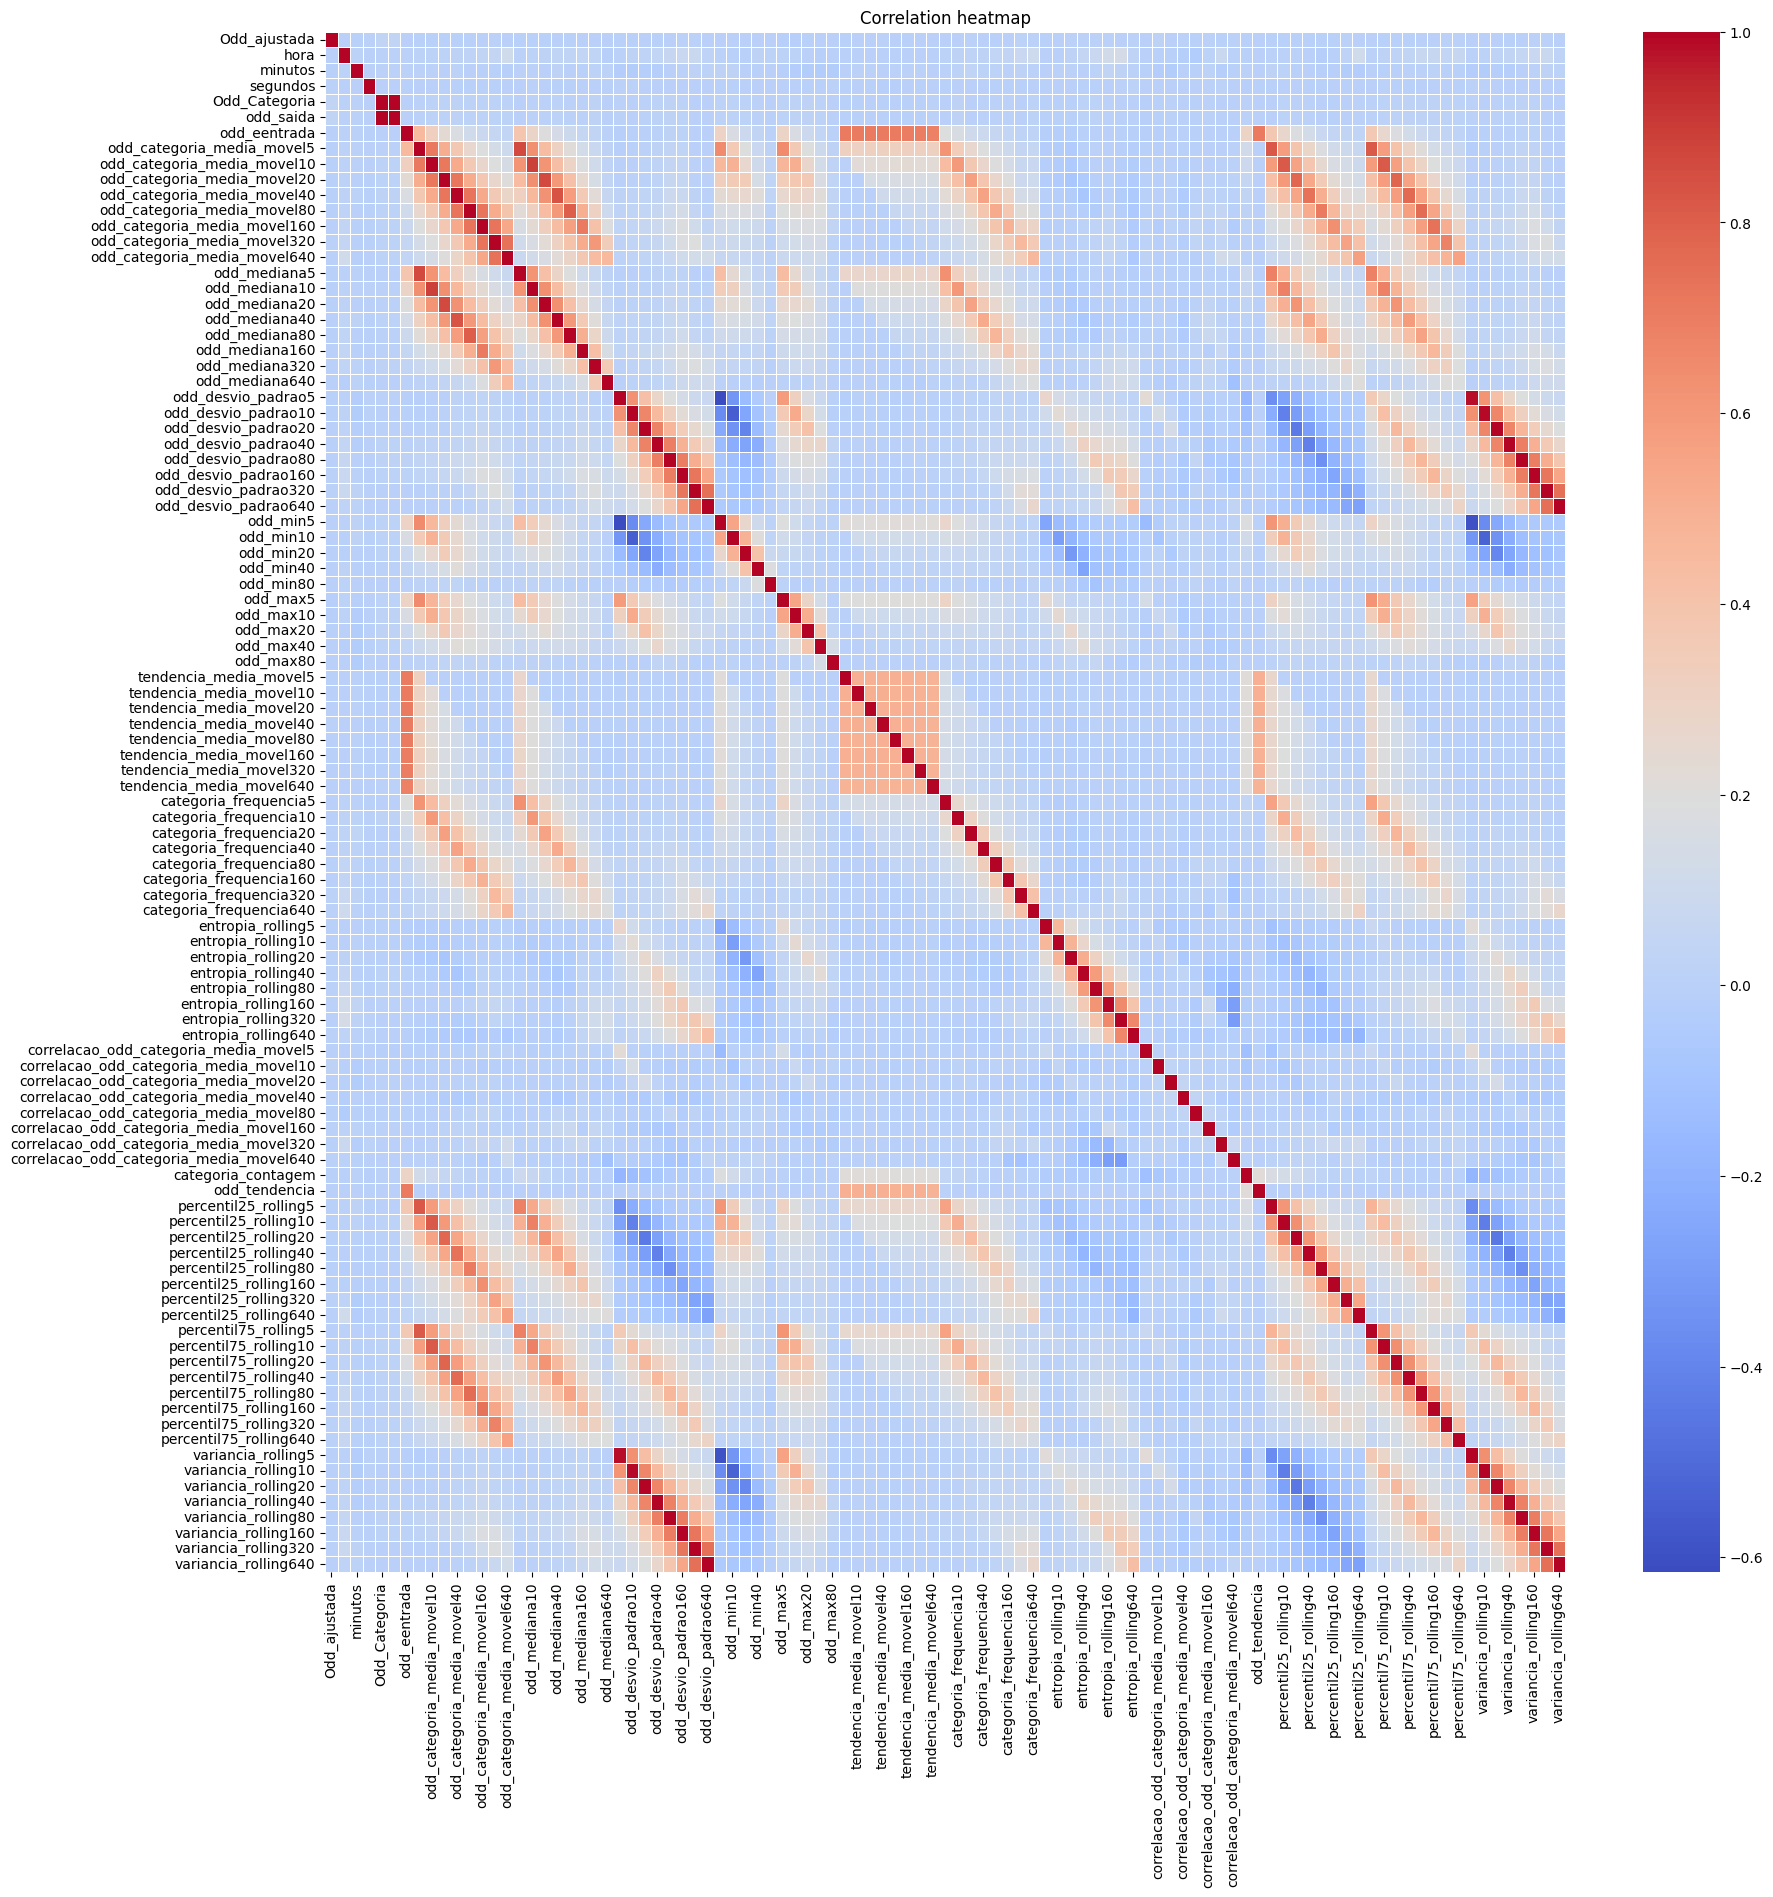

In [ ]:
# Calculando a matriz de correlação
corr_matrix = data.corr()

# Criando o heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=.5)
plt.title('Correlation heatmap')
plt.show()

In [25]:
path = '/content/drive/MyDrive/Aviator/Data1/data(1).csv'
data = pd.read_csv(path)
print(data)

        Unnamed: 0   Odd  Odd_Categoria  odd_entrada  \
0                0  1.15              3         11.0   
1                1  1.19              3          3.0   
2                2  5.92             10          3.0   
3                3  1.11              2         10.0   
4                4  1.06              2          2.0   
...            ...   ...            ...          ...   
999984      999984  1.71              6         10.0   
999985      999985  5.16             10          6.0   
999986      999986  1.23              3         10.0   
999987      999987  9.00             10          3.0   
999988      999988  2.26              7         10.0   

        odd_categoria_media_movel5  odd_categoria_media_movel10  \
0                              6.4                          6.5   
1                              5.8                          6.1   
2                              5.0                          5.7   
3                              6.4                         

In [5]:
data.columns

Index(['Unnamed: 0', 'Odd', 'Odd_Categoria', 'odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior'],
      dtype='object')

In [17]:
data[['categoria_frequencia20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10','categoria_contagem']].describe()

,categoria_frequencia20,odd_min10,odd_min20,odd_min40,odd_max10,categoria_contagem
count,999989.000000,999989.000000,999989.000000,999989.000000,999989.000000,999989.000000
mean,6.495644,1.866572,1.360201,1.096436,10.485378,93008.062794
std,2.890177,0.995694,0.591817,0.303212,0.830946,12526.906969
min,1.000000,1.000000,1.000000,1.000000,4.000000,57408.000000
25%,4.000000,1.000000,1.000000,1.000000,10.000000,84779.000000
50%,6.000000,2.000000,1.000000,1.000000,11.000000,98216.000000
75%,9.000000,2.000000,2.000000,1.000000,11.000000,100260.000000
max,11.000000,9.000000,6.000000,4.000000,11.000000,110738.000000


In [ ]:
data.to_excel('read-tableR.xlsx')

In [7]:
# Separar recursos (X) e rótulos (y)
X1 = data[['odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Dividir os dados em treinamento e teste
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Criar o modelo LSTM com camadas adicionais e dropout
model1 = Sequential()
model1.add(LSTM(64, input_shape=(X_train1.shape[1], 1), return_sequences=True))  # Camada LSTM com retorno de sequência
model1.add(Dropout(0.2))  # Camada de dropout para redução de overfitting
model1.add(LSTM(64))  # Segunda camada LSTM
model1.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Camada densa com regularização L2
model1.add(Dense(12, activation='softmax'))  # Camada de saída com ativação softmax para 11 categorias

# Compilar o modelo com uma taxa de aprendizado menor
model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Treinar o modelo
model_train1 = model1.fit(X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1), y_train1, epochs=50, batch_size=32, validation_split=0.2)
#model_train

# Avaliar o modelo no conjunto de teste
accuracy = model1.evaluate(X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1), y_test1)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsões
predictions = model1.predict(X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Calcular o F1-Score
f1 = f1_score(y_test1, predicted_labels, average='weighted')

print(f'F1-Score do modelo: {f1}')

Epoch 1/50
20000/20000 [==============================] - 1141s 56ms/step - loss: 2.3885 - accuracy: 0.1099 - val_loss: 2.3854 - val_accuracy: 0.1109
Epoch 2/50
20000/20000 [==============================] - 1067s 53ms/step - loss: 2.3859 - accuracy: 0.1110 - val_loss: 2.3854 - val_accuracy: 0.1109
Epoch 3/50
20000/20000 [==============================] - 1093s 55ms/step - loss: 2.3858 - accuracy: 0.1111 - val_loss: 2.3853 - val_accuracy: 0.1109
Epoch 4/50
20000/20000 [==============================] - 1071s 54ms/step - loss: 2.3858 - accuracy: 0.1111 - val_loss: 2.3854 - val_accuracy: 0.1109
Epoch 5/50
20000/20000 [==============================] - 1045s 52ms/step - loss: 2.3858 - accuracy: 0.1111 - val_loss: 2.3853 - val_accuracy: 0.1109
Epoch 6/50
20000/20000 [==============================] - 1063s 53ms/step - loss: 2.3858 - accuracy: 0.1111 - val_loss: 2.3854 - val_accuracy: 0.1109
Epoch 7/50
20000/20000 [==============================] - 1094s 55ms/step - loss: 2.3858 - accuracy:

KeyboardInterrupt: ignored

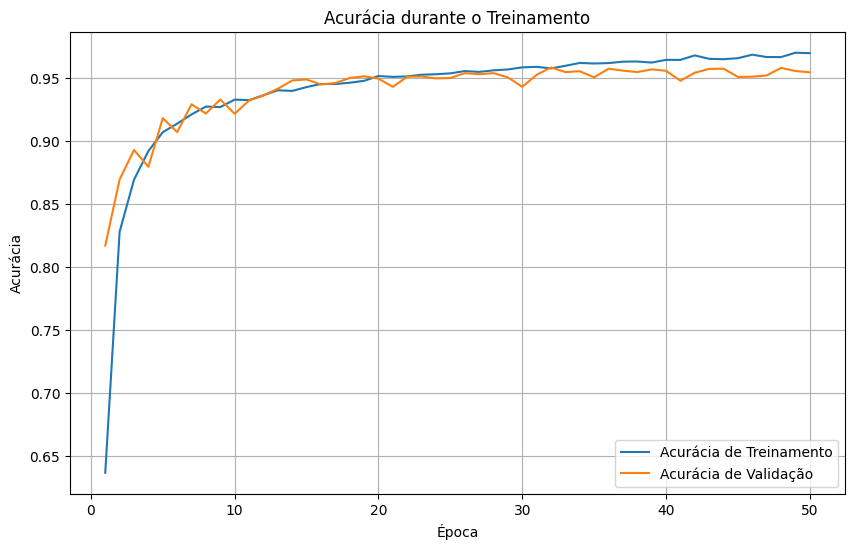

In [ ]:
# Extrair as métricas de treinamento
train_acc = model_train1.history['accuracy']
val_acc = model_train1.history['val_accuracy']

# Criar um gráfico da acurácia durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_acc, label='Acurácia de Treinamento')
plt.plot(range(1, 51), val_acc, label='Acurácia de Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data2 = data

In [ ]:
data.columns

Index(['Unnamed: 0', 'Game Hash', 'Odd', 'Odd_Categoria', 'odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior'],
      dtype='object')

In [26]:
data = data[['Odd_Categoria', 'odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']]
data.columns

Index(['Odd_Categoria', 'odd_entrada', 'odd_categoria_media_movel5',
       'odd_categoria_media_movel10', 'odd_categoria_media_movel20',
       'odd_categoria_media_movel40', 'odd_categoria_media_movel80',
       'odd_categoria_media_movel160', 'odd_categoria_media_movel320',
       'odd_categoria_media_movel640', 'odd_mediana20', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_max10', 'tendencia_media_movel10',
       'categoria_frequencia20', 'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior'],
      dtype='object')

In [10]:
data3 = data

In [24]:
data3

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,0.0,0.0,6.4,6.5,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.8,6.1,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,5.0,5.7,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,6.4,6.1,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,5.8,5.5,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,0.0,0.0,6.6,6.4,6.700000,6.025000,5.862500,6.06875,5.962500,6.145313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999985,0.0,0.0,6.2,6.1,6.450000,6.000000,5.912500,6.03750,5.962500,6.146875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999986,0.0,0.0,7.4,6.6,6.750000,6.075000,5.937500,6.03750,5.975000,6.145313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999987,0.0,0.0,6.8,5.9,6.700000,6.100000,5.962500,6.01875,5.968750,6.139062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from tensorflow.keras.utils import to_categorical
# Função para transformar rótulos em formato binário
def transformar_rotulos(rótulos, num_classes):
    return np.array([to_categorical(x-1, num_classes=num_classes) for x in rótulos])

In [15]:
num_classes = 11  # Número total de categorias
data['Odd_Categoria'] = transformar_rotulos(data['Odd_Categoria'].values, num_classes)

<ipython-input-15-1e4e1ae4131e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Odd_Categoria'] = transformar_rotulos(data['Odd_Categoria'].values, num_classes)


In [18]:
num_classes = 11  # Número total de categorias
less = ['odd_entrada','odd_min10','odd_min20', 'odd_min40', 'odd_max10','categoria_frequencia20','1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']
for name in less:
  data[name] = transformar_rotulos(data[name].values, num_classes)

<ipython-input-18-cbc21839a077>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name] = transformar_rotulos(data[name].values, num_classes)


In [22]:
data

,Odd_Categoria,odd_entrada,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640,...,1entrada-anterior,2entrada-anterior,3entrada-anterior,4entrada-anterior,5entrada-anterior,6entrada-anterior,7entrada-anterior,8entrada-anterior,9entrada-anterior,10entrada-anterior
0,0.0,0.0,6.4,6.5,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.8,6.1,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,5.0,5.7,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,6.4,6.1,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,5.8,5.5,6.245461,6.245462,6.245477,6.24550,6.245522,6.245548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,0.0,0.0,6.6,6.4,6.700000,6.025000,5.862500,6.06875,5.962500,6.145313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999985,0.0,0.0,6.2,6.1,6.450000,6.000000,5.912500,6.03750,5.962500,6.146875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999986,0.0,0.0,7.4,6.6,6.750000,6.075000,5.937500,6.03750,5.975000,6.145313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999987,0.0,0.0,6.8,5.9,6.700000,6.100000,5.962500,6.01875,5.968750,6.139062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data = data3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC, Precision, Recall
from sklearn.metrics import f1_score
import tensorflow as tf

def custom_loss(y_true, y_pred):
    # Calcula a diferença entre a previsão e o valor verdadeiro
    diff = y_true - y_pred

    # Encontrar as classes reais e previstas
    classes_true = tf.argmax(y_true, axis=1)
    classes_pred = tf.argmax(y_pred, axis=1)

    # Calcula a diferença entre as classes
    class_diff = tf.cast(classes_true, tf.float32) - tf.cast(classes_pred, tf.float32)

    # Penalizações diferentes para erros bons e ruins
    penalty_good_error = 0.5  # Menos penalidade para erros bons
    penalty_bad_error = 1.0   # Mais penalidade para erros ruins

    # Calcula a penalidade com base na natureza do erro
    penalty = tf.where(class_diff > 0, penalty_good_error, penalty_bad_error)

    # Expande a dimensão da penalidade para aplicá-la corretamente
    penalty = tf.expand_dims(penalty, axis=-1)
    penalty = tf.repeat(penalty, y_true.shape[1], axis=-1)

    # Calcula a perda total
    loss = penalty * tf.abs(diff)
    loss = tf.reduce_sum(loss, axis=-1)

    # Certifique-se de que a perda é um escalar
    return tf.reduce_mean(loss)


# Função para transformar rótulos em formato binário
def transformar_rotulos(rótulos, num_classes):
    return np.array([to_categorical(x-1, num_classes=num_classes) for x in rótulos])

num_classes = 11  # Número total de categorias
y_transformado = transformar_rotulos(data['Odd_Categoria'].values, num_classes)

# Preparar dados de entrada
X = data.drop('Odd_Categoria', axis=1).values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y_transformado, test_size=0.2, random_state=42)

# Criar o modelo
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))  # Usando sigmoid para saída binária

# Compilar o modelo
model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=100, batch_size=96, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsõesa
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Transformar previsões em rótulos categóricos
predicted_labels = np.argmax(predictions, axis=1) + 1  # Adiciona 1 porque os índices começam em 0

# Calcular o F1-Score
y_test_categorical = np.argmax(y_test, axis=1) + 1  # Transforma y_test de volta para formato categórico
f1 = f1_score(y_test_categorical, predicted_labels, average='weighted')
print(f'F1-Score do modelo: {f1}')


Epoch 1/100
6667/6667 [==============================] - 1627s 243ms/step - loss: 0.6667 - accuracy: 0.0952 - val_loss: 0.6618 - val_accuracy: 0.0965
Epoch 2/100
6667/6667 [==============================] - 1580s 237ms/step - loss: 0.6621 - accuracy: 0.0956 - val_loss: 0.6618 - val_accuracy: 0.0965
Epoch 3/100
6667/6667 [==============================] - 1498s 225ms/step - loss: 0.6668 - accuracy: 0.0964 - val_loss: 0.7497 - val_accuracy: 0.1095
Epoch 4/100
6667/6667 [==============================] - 1549s 232ms/step - loss: 0.7604 - accuracy: 0.1103 - val_loss: 0.7657 - val_accuracy: 0.1109
Epoch 5/100
6667/6667 [==============================] - 1470s 221ms/step - loss: 0.7654 - accuracy: 0.1111 - val_loss: 0.7657 - val_accuracy: 0.1109
Epoch 6/100
6667/6667 [==============================] - 1507s 226ms/step - loss: 0.7654 - accuracy: 0.1111 - val_loss: 0.7657 - val_accuracy: 0.1109
Epoch 7/100
6667/6667 [==============================] - 1534s 230ms/step - loss: 0.7654 - accuracy:

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC, Precision, Recall
from sklearn.metrics import f1_score
import tensorflow as tf

def custom_loss(y_true, y_pred):
    # Mantenha as previsões e os valores verdadeiros no formato one-hot
    # Calcule a diferença entre a previsão e o valor verdadeiro
    diff = y_true - y_pred

    # Encontrar as classes reais e previstas
    classes_true = tf.argmax(y_true, axis=1)
    classes_pred = tf.argmax(y_pred, axis=1)

    # Calcule a diferença entre as classes
    class_diff = tf.cast(classes_true, tf.float32) - tf.cast(classes_pred, tf.float32)

    # Penalizações diferentes para erros bons e ruins
    penalty_good_error = 0.5  # Menos penalidade para erros bons
    penalty_bad_error = 1.0   # Mais penalidade para erros ruins

    # Aplica a penalidade conforme a natureza do erro
    loss = tf.where(class_diff > 0, penalty_good_error * tf.abs(diff), penalty_bad_error * tf.abs(diff))

    # Certifique-se de que a perda é um escalar
    return tf.reduce_mean(loss)


# Separar recursos (X) e rótulos (y)
X1 = data[['odd_entrada',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana20', 'odd_min10', 'odd_min20', 'odd_min40', 'odd_max10',
       'tendencia_media_movel10', 'categoria_frequencia20',
       'entropia_rolling5', 'entropia_rolling320',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'variancia_rolling10', 'variancia_rolling20', 'variancia_rolling320',
       '1entrada-anterior', '2entrada-anterior', '3entrada-anterior',
       '4entrada-anterior', '5entrada-anterior', '6entrada-anterior',
       '7entrada-anterior', '8entrada-anterior', '9entrada-anterior',
       '10entrada-anterior']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y_transformado, test_size=0.2, random_state=42)

# Criar o modelo
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))  # Usando sigmoid para saída binária

# Compilar o modelo
model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=50, batch_size=32, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)[1]
print(f'Acurácia do modelo: {accuracy}')

# Fazer previsõesa
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Transformar previsões em rótulos categóricos
predicted_labels = np.argmax(predictions, axis=1) + 1  # Adiciona 1 porque os índices começam em 0

# Calcular o F1-Score
y_test_categorical = np.argmax(y_test, axis=1) + 1  # Transforma y_test de volta para formato categórico
f1 = f1_score(y_test_categorical, predicted_labels, average='weighted')
print(f'F1-Score do modelo: {f1}')

Epoch 1/50


ValueError: ignored

In [ ]:
data_predict1 = pd.DataFrame()
data_predict1['teste'] = y_test1
data_predict1['predicao'] = predicted_labels
data_predict1

,teste,predicao
0,3,3
1,8,8
2,10,10
3,9,9
4,7,7
...,...,...
7467,8,8
7468,3,3
7469,9,9
7470,10,10


In [ ]:
# Importe as bibliotecas necessárias
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Separar recursos (X) e rótulos (y)
X1 = data[['odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10',
       'odd_max20', 'odd_max40', 'odd_max80', 'tendencia_media_movel5',
       'tendencia_media_movel10', 'tendencia_media_movel20',
       'tendencia_media_movel40', 'tendencia_media_movel80',
       'tendencia_media_movel160', 'tendencia_media_movel320',
       'tendencia_media_movel640', 'categoria_frequencia5',
       'categoria_frequencia10', 'categoria_frequencia20',
       'categoria_frequencia40', 'categoria_frequencia80',
       'categoria_frequencia160', 'categoria_frequencia320',
       'categoria_frequencia640', 'entropia_rolling5', 'entropia_rolling10',
       'entropia_rolling20', 'entropia_rolling40', 'entropia_rolling80',
       'entropia_rolling160', 'entropia_rolling320', 'entropia_rolling640',
       'correlacao_odd_categoria_media_movel5',
       'correlacao_odd_categoria_media_movel10',
       'correlacao_odd_categoria_media_movel20',
       'correlacao_odd_categoria_media_movel40',
       'correlacao_odd_categoria_media_movel80',
       'correlacao_odd_categoria_media_movel160',
       'correlacao_odd_categoria_media_movel320',
       'correlacao_odd_categoria_media_movel640', 'categoria_contagem',
       'odd_tendencia', 'percentil25_rolling5', 'percentil25_rolling10',
       'percentil25_rolling20', 'percentil25_rolling40',
       'percentil25_rolling80', 'percentil25_rolling160',
       'percentil25_rolling320', 'percentil25_rolling640',
       'percentil75_rolling5', 'percentil75_rolling10',
       'percentil75_rolling20', 'percentil75_rolling40',
       'percentil75_rolling80', 'percentil75_rolling160',
       'percentil75_rolling320', 'percentil75_rolling640',
       'variancia_rolling5', 'variancia_rolling10', 'variancia_rolling20',
       'variancia_rolling40', 'variancia_rolling80', 'variancia_rolling160',
       'variancia_rolling320', 'variancia_rolling640']].values
y1 = data['Odd_Categoria'].values

# Normalizar os recursos (importante para redes neurais)
scaler1 = StandardScaler()
X1 = scaler1.fit_transform(X1)

# Divida seus dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Crie uma instância do GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Defina a grade de hiperparâmetros para pesquisa
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Crie uma instância do GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=2)

# Execute a pesquisa de grade no conjunto de treinamento
grid_search.fit(X_train, y_train)

# Encontre os melhores hiperparâmetros
best_params = grid_search.best_params_
print(f'Melhores hiperparâmetros: {best_params}')

# Use o modelo com os melhores hiperparâmetros para previsões
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')

# Calcular o F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score do modelo: {f1}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
data['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5)
data['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10)
data['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20)
data['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40)
data['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80)
data['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160)
data['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320)
data['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640)
data = data.fillna(data.mean())


k2_odd_categoria_media_movel5 = data['Odd_Categoria'].rolling(window=5).mean().iloc[-1]
k2_odd_categoria_media_movel10 = data['Odd_Categoria'].rolling(window=10).mean().iloc[-1]
k2_odd_categoria_media_movel20 = data['Odd_Categoria'].rolling(window=20).mean().iloc[-1]
k2_odd_categoria_media_movel40 = data['Odd_Categoria'].rolling(window=40).mean().iloc[-1]
k2_odd_categoria_media_movel80 = data['Odd_Categoria'].rolling(window=80).mean().iloc[-1]
k2_odd_categoria_media_movel160 = data['Odd_Categoria'].rolling(window=160).mean().iloc[-1]
k2_odd_categoria_media_movel320 = data['Odd_Categoria'].rolling(window=320).mean().iloc[-1]
k2_odd_categoria_media_movel640 = data['Odd_Categoria'].rolling(window=640).mean().iloc[-1]

  # Estatísticas Descritivas
k2_odd_mediana5 = data['Odd_Categoria'].rolling(window=5).median().iloc[-1]
k2_odd_mediana10 = data['Odd_Categoria'].rolling(window=10).median().iloc[-1]
k2_odd_mediana20 = data['Odd_Categoria'].rolling(window=20).median().iloc[-1]
k2_odd_mediana40 = data['Odd_Categoria'].rolling(window=40).median().iloc[-1]
k2_odd_mediana80 = data['Odd_Categoria'].rolling(window=80).median().iloc[-1]
k2_odd_mediana160 = data['Odd_Categoria'].rolling(window=160).median().iloc[-1]
k2_odd_mediana320 = data['Odd_Categoria'].rolling(window=320).median().iloc[-1]
k2_odd_mediana640 = data['Odd_Categoria'].rolling(window=640).median().iloc[-1]

k2_odd_desvio_padrao5 = data['Odd_Categoria'].rolling(window=5).std().iloc[-1]
k2_odd_desvio_padrao10 = data['Odd_Categoria'].rolling(window=10).std().iloc[-1]
k2_odd_desvio_padrao20 = data['Odd_Categoria'].rolling(window=20).std().iloc[-1]
k2_odd_desvio_padrao40 = data['Odd_Categoria'].rolling(window=40).std().iloc[-1]
k2_odd_desvio_padrao80 = data['Odd_Categoria'].rolling(window=80).std().iloc[-1]
k2_odd_desvio_padrao160 = data['Odd_Categoria'].rolling(window=160).std().iloc[-1]
k2_odd_desvio_padrao320 = data['Odd_Categoria'].rolling(window=320).std().iloc[-1]
k2_odd_desvio_padrao640 = data['Odd_Categoria'].rolling(window=640).std().iloc[-1]

k2_odd_min5 = data['Odd_Categoria'].rolling(window=5).min().iloc[-1]
k2_odd_min10 = data['Odd_Categoria'].rolling(window=10).min().iloc[-1]
k2_odd_min20 = data['Odd_Categoria'].rolling(window=20).min().iloc[-1]
k2_odd_min40 = data['Odd_Categoria'].rolling(window=40).min().iloc[-1]
k2_odd_min80 = data['Odd_Categoria'].rolling(window=80).min().iloc[-1]

k2_odd_max5 = data['Odd_Categoria'].rolling(window=5).max().iloc[-1]
k2_odd_max10 = data['Odd_Categoria'].rolling(window=10).max().iloc[-1]
k2_odd_max20 = data['Odd_Categoria'].rolling(window=20).max().iloc[-1]
k2_odd_max40 = data['Odd_Categoria'].rolling(window=40).max().iloc[-1]
k2_odd_max80 = data['Odd_Categoria'].rolling(window=80).max().iloc[-1]

  # Tendência das Odds
k2_odd_tendencia = data['Odd_Categoria'].diff().iloc[-1]

  # Tendência de Média Móvel
k2_tendencia_media_movel5 = data['odd_categoria_media_movel5'].diff().iloc[-1]
k2_tendencia_media_movel10 = data['odd_categoria_media_movel10'].diff().iloc[-1]
k2_tendencia_media_movel20 = data['odd_categoria_media_movel20'].diff().iloc[-1]
k2_tendencia_media_movel40 = data['odd_categoria_media_movel40'].diff().iloc[-1]
k2_tendencia_media_movel80 = data['odd_categoria_media_movel80'].diff().iloc[-1]
k2_tendencia_media_movel160 = data['odd_categoria_media_movel160'].diff().iloc[-1]
k2_tendencia_media_movel320 = data['odd_categoria_media_movel320'].diff().iloc[-1]
k2_tendencia_media_movel640 = data['odd_categoria_media_movel640'].diff().iloc[-1]

  # Contagem de repetições das categorias
k2_categoria_contagem = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts()).iloc[-1]

k2_values = pd.Series({'odd_categoria_media_movel5': k2_odd_categoria_media_movel5, 'odd_categoria_media_movel10': k2_odd_categoria_media_movel10,
        'odd_categoria_media_movel20': k2_odd_categoria_media_movel20, 'odd_categoria_media_movel40': k2_odd_categoria_media_movel40,
        'odd_categoria_media_movel80': k2_odd_categoria_media_movel80, 'odd_categoria_media_movel160': k2_odd_categoria_media_movel160,
        'odd_categoria_media_movel320': k2_odd_categoria_media_movel320, 'odd_categoria_media_movel640': k2_odd_categoria_media_movel640,
        'odd_mediana5': k2_odd_mediana5, 'odd_mediana10': k2_odd_mediana10, 'odd_mediana20': k2_odd_mediana20, 'odd_mediana40': k2_odd_mediana40,
        'odd_mediana80': k2_odd_mediana80, 'odd_mediana160': k2_odd_mediana160, 'odd_mediana320': k2_odd_mediana320, 'odd_mediana640': k2_odd_mediana640,
        'odd_desvio_padrao5': k2_odd_desvio_padrao5, 'odd_desvio_padrao10': k2_odd_desvio_padrao10, 'odd_desvio_padrao20': k2_odd_desvio_padrao20,
        'odd_desvio_padrao40': k2_odd_desvio_padrao10, 'odd_desvio_padrao80': k2_odd_desvio_padrao80, 'odd_desvio_padrao160': k2_odd_desvio_padrao160,
        'odd_desvio_padrao320': k2_odd_desvio_padrao320, 'odd_desvio_padrao640': k2_odd_desvio_padrao640, 'odd_min5': k2_odd_min5, 'odd_min10': k2_odd_min5,
        'odd_min20': k2_odd_min5, 'odd_min40': k2_odd_min40, 'odd_min80': k2_odd_min80, 'odd_max5': k2_odd_max5, 'odd_max10': k2_odd_max10, 'odd_max20': k2_odd_max20, 'odd_max40': k2_odd_max40,
        'odd_max80': k2_odd_max80, 'odd_tendencia': k2_odd_tendencia,
        'tendencia_media_movel5': k2_tendencia_media_movel5, 'tendencia_media_movel10': k2_tendencia_media_movel10,
        'tendencia_media_movel20': k2_tendencia_media_movel20, 'tendencia_media_movel40': k2_tendencia_media_movel40,
        'tendencia_media_movel80': k2_tendencia_media_movel80, 'tendencia_media_movel160': k2_tendencia_media_movel160,
        'tendencia_media_movel320': k2_tendencia_media_movel320, 'tendencia_media_movel640': k2_tendencia_media_movel640,
        'categoria_contagem': k2_categoria_contagem}).to_frrame().T

NameError: ignored

In [ ]:
data5 = pd.DataFrame()
data5['Odd_ajustada'] = data1['Odd_ajustada']
data5['horario'] = data1['horario']
data5['hora'] = data1['hora']

In [ ]:
array

[['18:21:30'],
 ['18:21:58'],
 ['18:22:25'],
 ['18:22:53'],
 ['18:23:20'],
 ['18:23:48'],
 ['18:24:15'],
 ['18:24:43'],
 ['18:25:10'],
 ['18:25:38'],
 ['18:26:05'],
 ['18:26:33'],
 ['18:27:00'],
 ['18:27:28'],
 ['18:27:55'],
 ['18:28:23'],
 ['18:28:50'],
 ['18:29:18'],
 ['18:29:45'],
 ['18:30:13'],
 ['18:30:40'],
 ['18:31:08'],
 ['18:31:35'],
 ['18:32:03'],
 ['18:32:30'],
 ['18:32:58'],
 ['18:33:25'],
 ['18:33:53'],
 ['18:34:20'],
 ['18:34:48'],
 ['18:35:15'],
 ['18:35:43'],
 ['18:36:10'],
 ['18:36:38'],
 ['18:37:05'],
 ['18:37:33'],
 ['18:38:00'],
 ['18:38:28'],
 ['18:38:55'],
 ['18:39:23'],
 ['18:39:50'],
 ['18:40:18'],
 ['18:40:45'],
 ['18:41:13'],
 ['18:41:40'],
 ['18:42:08'],
 ['18:42:35'],
 ['18:43:03'],
 ['18:43:30'],
 ['18:43:58'],
 ['18:44:25'],
 ['18:44:53'],
 ['18:45:20'],
 ['18:45:48'],
 ['18:46:15'],
 ['18:46:43'],
 ['18:47:10'],
 ['18:47:38'],
 ['18:48:05'],
 ['18:48:33'],
 ['18:49:00'],
 ['18:49:28'],
 ['18:49:55'],
 ['18:50:23'],
 ['18:50:50'],
 ['18:51:18'],
 ['18:51:4

In [ ]:
mno = 0
while mno <= 150:
  print("Olá chefe, tudo bem ? Estamos em: ", mno + 1)
  data3 = data5
  data4 = data5
  data = data3
  # Remova linhas com valores ausentes resultantes das operações de janelas
  data = data.fillna(data.mean())
  #data.head()
  print(data.shape)

  # Verificar se existem valores NaN na coluna "Odd_ajustada"
  has_nan = data['Odd_ajustada'].isna().any()
  if has_nan:
      print("Existem valores NaN na coluna 'Odd_ajustada'. Teste - 1")
  else:
      print("Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1")

  novo_horario = pd.to_datetime(array[mno])

  # Resultado
  print(novo_horario)
  k_entrada = pd.DataFrame([novo_horario], columns=['horario'])

  k_entrada['hora'] = novo_horario.hour
  k_entrada['minutos'] = novo_horario.minute
  k_entrada['segundos'] = novo_horario.second

  if int(k_entrada['hora']) >= 6 and int(k_entrada['hora']) <  12:
    k_entrada['parte_do_dia'] = 1
  elif int(k_entrada['hora']) >= 12 and int(k_entrada['hora']) < 18:
    k_entrada['parte_do_dia'] = 2
  elif 18 <= int(k_entrada['hora']) < 24:
    k_entrada['parte_do_dia'] = 3
  else:
    k_entrada['parte_do_dia'] = 4
  print(k_entrada['parte_do_dia'])

  data = data5
  # Remova linhas com valores ausentes resultantes das operações de janelas
  data = data.fillna(data.mean())
  # Verificar se existem valores NaN na coluna "Odd_ajustada"
  has_nan = data['Odd_ajustada'].isna().any()
  if has_nan:
      print("Existem valores NaN na coluna 'Odd_ajustada'.")
  else:
      print("Não existem valores NaN na coluna 'Odd_ajustada'.")

  geral_cat = []
  for name in data['Odd_ajustada']:
    #print(name)
    if name < 1.05:
      geral_cat.append(1)
    elif name >= 1.05 and name < 1.15:
      geral_cat.append(2)
    elif name >= 1.15 and name < 1.3:
      geral_cat.append(3)
    elif name >= 1.3 and name < 1.45:
      geral_cat.append(4)
    elif name >= 1.45 and name < 1.7:
      geral_cat.append(5)
    elif name >= 1.7 and name < 2.1:
      geral_cat.append(6)
    elif name >= 2.1 and name < 2.6:
      geral_cat.append(7)
    elif name >= 2.6 and name < 3.5:
      geral_cat.append(8)
    elif name >= 3.5 and name < 5:
      geral_cat.append(9)
    elif name >= 5 and name < 10:
      geral_cat.append(10)
    elif name >= 10:
      geral_cat.append(11)

  geral_cat1 = pd.DataFrame([geral_cat]).T
  geral_cat1.columns = ['Odd_Categoria']
  data = pd.concat([data, geral_cat1], axis = 1)

  data['Odd_Categoria'].describe()
  part = []

  for k in range(1, len(data)):
      #print(k, data['hora'][k], type(data['hora'][k]))
      if data['hora'][k] >= 6 and data['hora'][k] <  12:
          part.append(1)
      elif data['hora'][k] >= 12 and data['hora'][k] < 18:
          part.append(2)
      elif 18 <= data['hora'][k] < 24:
          part.append(3)
      else:
          part.append(4)
  part1 = np.ones(len(data), dtype = int)
  for i in range(0, len(data)):
      if i == 0:
          part1[i] = part[i]
      else:
          part1[i] = part[i - 1]

  data['parte_do_dia'] = part1

  data['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).mean()
  data['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).mean()
  data['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).mean()
  data['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).mean()
  data['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).mean()
  data['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).mean()
  data['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).mean()
  data['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).mean()
  data = data.fillna(data.mean())

  k2_entradap = k_entrada['parte_do_dia'].iloc[-1]

  k2_odd_categoria_media_movel5 = data['Odd_Categoria'].rolling(window=5).mean().iloc[-1]
  k2_odd_categoria_media_movel10 = data['Odd_Categoria'].rolling(window=10).mean().iloc[-1]
  k2_odd_categoria_media_movel20 = data['Odd_Categoria'].rolling(window=20).mean().iloc[-1]
  k2_odd_categoria_media_movel40 = data['Odd_Categoria'].rolling(window=40).mean().iloc[-1]
  k2_odd_categoria_media_movel80 = data['Odd_Categoria'].rolling(window=80).mean().iloc[-1]
  k2_odd_categoria_media_movel160 = data['Odd_Categoria'].rolling(window=160).mean().iloc[-1]
  k2_odd_categoria_media_movel320 = data['Odd_Categoria'].rolling(window=320).mean().iloc[-1]
  k2_odd_categoria_media_movel640 = data['Odd_Categoria'].rolling(window=640).mean().iloc[-1]

  # Estatísticas Descritivas
  k2_odd_mediana5 = data['Odd_Categoria'].rolling(window=5).median().iloc[-1]
  k2_odd_mediana10 = data['Odd_Categoria'].rolling(window=10).median().iloc[-1]
  k2_odd_mediana20 = data['Odd_Categoria'].rolling(window=20).median().iloc[-1]
  k2_odd_mediana40 = data['Odd_Categoria'].rolling(window=40).median().iloc[-1]
  k2_odd_mediana80 = data['Odd_Categoria'].rolling(window=80).median().iloc[-1]
  k2_odd_mediana160 = data['Odd_Categoria'].rolling(window=160).median().iloc[-1]
  k2_odd_mediana320 = data['Odd_Categoria'].rolling(window=320).median().iloc[-1]
  k2_odd_mediana640 = data['Odd_Categoria'].rolling(window=640).median().iloc[-1]

  k2_odd_desvio_padrao5 = data['Odd_Categoria'].rolling(window=5).std().iloc[-1]
  k2_odd_desvio_padrao10 = data['Odd_Categoria'].rolling(window=10).std().iloc[-1]
  k2_odd_desvio_padrao20 = data['Odd_Categoria'].rolling(window=20).std().iloc[-1]
  k2_odd_desvio_padrao40 = data['Odd_Categoria'].rolling(window=40).std().iloc[-1]
  k2_odd_desvio_padrao80 = data['Odd_Categoria'].rolling(window=80).std().iloc[-1]
  k2_odd_desvio_padrao160 = data['Odd_Categoria'].rolling(window=160).std().iloc[-1]
  k2_odd_desvio_padrao320 = data['Odd_Categoria'].rolling(window=320).std().iloc[-1]
  k2_odd_desvio_padrao640 = data['Odd_Categoria'].rolling(window=640).std().iloc[-1]

  k2_odd_min5 = data['Odd_Categoria'].rolling(window=5).min().iloc[-1]
  k2_odd_min10 = data['Odd_Categoria'].rolling(window=10).min().iloc[-1]
  k2_odd_min20 = data['Odd_Categoria'].rolling(window=20).min().iloc[-1]
  k2_odd_min40 = data['Odd_Categoria'].rolling(window=40).min().iloc[-1]
  k2_odd_min80 = data['Odd_Categoria'].rolling(window=80).min().iloc[-1]

  k2_odd_max5 = data['Odd_Categoria'].rolling(window=5).max().iloc[-1]
  k2_odd_max10 = data['Odd_Categoria'].rolling(window=10).max().iloc[-1]
  k2_odd_max20 = data['Odd_Categoria'].rolling(window=20).max().iloc[-1]
  k2_odd_max40 = data['Odd_Categoria'].rolling(window=40).max().iloc[-1]
  k2_odd_max80 = data['Odd_Categoria'].rolling(window=80).max().iloc[-1]

  # Tendência das Odds
  k2_odd_tendencia = data['Odd_Categoria'].diff().iloc[-1]

  # Tendência de Média Móvel
  k2_tendencia_media_movel5 = data['odd_categoria_media_movel5'].diff().iloc[-1]
  k2_tendencia_media_movel10 = data['odd_categoria_media_movel10'].diff().iloc[-1]
  k2_tendencia_media_movel20 = data['odd_categoria_media_movel20'].diff().iloc[-1]
  k2_tendencia_media_movel40 = data['odd_categoria_media_movel40'].diff().iloc[-1]
  k2_tendencia_media_movel80 = data['odd_categoria_media_movel80'].diff().iloc[-1]
  k2_tendencia_media_movel160 = data['odd_categoria_media_movel160'].diff().iloc[-1]
  k2_tendencia_media_movel320 = data['odd_categoria_media_movel320'].diff().iloc[-1]
  k2_tendencia_media_movel640 = data['odd_categoria_media_movel640'].diff().iloc[-1]

  # Contagem de repetições das categorias
  k2_categoria_contagem = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts()).iloc[-1]

  k2_values = {'odd_categoria_media_movel5': k2_odd_categoria_media_movel5, 'odd_categoria_media_movel10': k2_odd_categoria_media_movel10,
        'odd_categoria_media_movel20': k2_odd_categoria_media_movel20, 'odd_categoria_media_movel40': k2_odd_categoria_media_movel40,
        'odd_categoria_media_movel80': k2_odd_categoria_media_movel80, 'odd_categoria_media_movel160': k2_odd_categoria_media_movel160,
        'odd_categoria_media_movel320': k2_odd_categoria_media_movel320, 'odd_categoria_media_movel640': k2_odd_categoria_media_movel640,
        'odd_mediana5': k2_odd_mediana5, 'odd_mediana10': k2_odd_mediana10, 'odd_mediana20': k2_odd_mediana20, 'odd_mediana40': k2_odd_mediana40,
        'odd_mediana80': k2_odd_mediana80, 'odd_mediana160': k2_odd_mediana160, 'odd_mediana320': k2_odd_mediana320, 'odd_mediana640': k2_odd_mediana640,
        'odd_desvio_padrao5': k2_odd_desvio_padrao5, 'odd_desvio_padrao10': k2_odd_desvio_padrao10, 'odd_desvio_padrao20': k2_odd_desvio_padrao20,
        'odd_desvio_padrao40': k2_odd_desvio_padrao10, 'odd_desvio_padrao80': k2_odd_desvio_padrao80, 'odd_desvio_padrao160': k2_odd_desvio_padrao160,
        'odd_desvio_padrao320': k2_odd_desvio_padrao320, 'odd_desvio_padrao640': k2_odd_desvio_padrao640, 'odd_min5': k2_odd_min5, 'odd_min10': k2_odd_min5,
        'odd_min20': k2_odd_min5, 'odd_min40': k2_odd_min40, 'odd_min80': k2_odd_min80, 'odd_max5': k2_odd_max5, 'odd_max10': k2_odd_max10, 'odd_max20': k2_odd_max20, 'odd_max40': k2_odd_max40,
        'odd_max80': k2_odd_max80, 'odd_tendencia': k2_odd_tendencia,
        'tendencia_media_movel5': k2_tendencia_media_movel5, 'tendencia_media_movel10': k2_tendencia_media_movel10,
        'tendencia_media_movel20': k2_tendencia_media_movel20, 'tendencia_media_movel40': k2_tendencia_media_movel40,
        'tendencia_media_movel80': k2_tendencia_media_movel80, 'tendencia_media_movel160': k2_tendencia_media_movel160,
        'tendencia_media_movel320': k2_tendencia_media_movel320, 'tendencia_media_movel640': k2_tendencia_media_movel640,
        'categoria_contagem': k2_categoria_contagem, 'parte_do_dia': k2_entradap}

  # Especifique um índice (por exemplo, 'k1') para a entrada
  k2_entrada = pd.Series(k2_values, name=len(data)+1).to_frame().T

  # Verifique se há valores nulos em cada coluna
  valores_ausentes = k2_entrada.isna().sum()

  # Exiba as colunas com valores nulos e suas contagens
  print(valores_ausentes[valores_ausentes > 0])

  X6 = k2_entrada[['parte_do_dia',
        'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
        'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
        'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
        'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
        'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
        'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
        'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
        'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
        'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
        'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
        'odd_max80', 'odd_tendencia',
        'tendencia_media_movel5', 'tendencia_media_movel10',
        'tendencia_media_movel20', 'tendencia_media_movel40',
        'tendencia_media_movel80', 'tendencia_media_movel160',
        'tendencia_media_movel320', 'tendencia_media_movel640',
        'categoria_contagem']].values
        # Separar recursos (X) e rótulos (y)

  X6 = scaler1.transform(X6)

  # Fazer previsões
  predictions6 = model1.predict(X6.reshape(X6.shape[0], X6.shape[1], 1))

  # Arredondar as previsões para obter rótulos de classe
  predicted_labels6 = np.argmax(predictions6, axis=1)
  # Adicionar as previsões ao DataFrame
  k2_entrada['Odd_Categoria'] = predicted_labels6

  if int(k2_entrada['Odd_Categoria']) == 1:
    k2_entrada['Odd_Ajustada'] = 1.00
  elif int(k2_entrada['Odd_Categoria']) == 2:
    name = (1.05 +  1.15) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 3:
    name = (1.15 +  1.3) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 4:
    name = (1.3 +  1.45) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 5:
    name = (1.45 +  1.7) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 6:
    name = (1.7 + 2.1) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 7:
    name = (2.1 +  2.6) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 8:
    name = (2.6 +  3.5) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 9:
    name = (3.5 + 5) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 10:
    name = (5 +  10) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 11:
    name = 10
    k2_entrada['Odd_Ajustada'] = name

  datareset1 = k2_entrada['Odd_Ajustada'].iloc[-1]
  datareset2 = k_entrada['horario'].iloc[-1]
  datareset3 = datareset2.hour

  datareset2 = pd.to_datetime(datareset2).strftime('%a %b %d %H:%M:%S %Y')

  kn_entrada = {'Odd_ajustada': datareset1, 'hora': datareset3, 'horario': datareset2}
  print(kn_entrada)
  data5 = data5.append(kn_entrada, ignore_index=True)

  # Redefinir o estado interno da LSTM
  model1.reset_states()
  data5 = data5.fillna(data5.mean())
  mno += 1

Olá chefe, tudo bem ? Estamos em:  1
(35917, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:21:30'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this wa

Series([], dtype: int64)
1/1 [==============================] - 0s 45ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:21:30 2023'}
Olá chefe, tudo bem ? Estamos em:  2
(35918, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:21:58'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:21:58 2023'}
Olá chefe, tudo bem ? Estamos em:  3
(35919, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:22:25'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:22:25 2023'}
Olá chefe, tudo bem ? Estamos em:  4
(35920, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:22:53'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:22:53 2023'}
Olá chefe, tudo bem ? Estamos em:  5
(35921, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:23:20'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:23:20 2023'}
Olá chefe, tudo bem ? Estamos em:  6
(35922, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:23:48'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:23:48 2023'}
Olá chefe, tudo bem ? Estamos em:  7
(35923, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:24:15'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:24:15 2023'}
Olá chefe, tudo bem ? Estamos em:  8
(35924, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:24:43'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 20ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:24:43 2023'}
Olá chefe, tudo bem ? Estamos em:  9
(35925, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:25:10'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:25:10 2023'}
Olá chefe, tudo bem ? Estamos em:  10
(35926, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:25:38'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:25:38 2023'}
Olá chefe, tudo bem ? Estamos em:  11
(35927, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:26:05'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:26:05 2023'}
Olá chefe, tudo bem ? Estamos em:  12
(35928, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:26:33'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:26:33 2023'}
Olá chefe, tudo bem ? Estamos em:  13
(35929, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:27:00'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:27:00 2023'}
Olá chefe, tudo bem ? Estamos em:  14
(35930, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:27:28'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:27:28 2023'}
Olá chefe, tudo bem ? Estamos em:  15
(35931, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:27:55'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:27:55 2023'}
Olá chefe, tudo bem ? Estamos em:  16
(35932, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:28:23'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:28:23 2023'}
Olá chefe, tudo bem ? Estamos em:  17
(35933, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:28:50'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:28:50 2023'}
Olá chefe, tudo bem ? Estamos em:  18
(35934, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:29:18'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 20ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:29:18 2023'}
Olá chefe, tudo bem ? Estamos em:  19
(35935, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:29:45'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:29:45 2023'}
Olá chefe, tudo bem ? Estamos em:  20
(35936, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:30:13'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:30:13 2023'}
Olá chefe, tudo bem ? Estamos em:  21
(35937, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:30:40'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:30:40 2023'}
Olá chefe, tudo bem ? Estamos em:  22
(35938, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:31:08'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:31:08 2023'}
Olá chefe, tudo bem ? Estamos em:  23
(35939, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:31:35'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:31:35 2023'}
Olá chefe, tudo bem ? Estamos em:  24
(35940, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:32:03'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:32:03 2023'}
Olá chefe, tudo bem ? Estamos em:  25
(35941, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:32:30'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:32:30 2023'}
Olá chefe, tudo bem ? Estamos em:  26
(35942, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:32:58'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:32:58 2023'}
Olá chefe, tudo bem ? Estamos em:  27
(35943, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:33:25'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:33:25 2023'}
Olá chefe, tudo bem ? Estamos em:  28
(35944, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:33:53'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:33:53 2023'}
Olá chefe, tudo bem ? Estamos em:  29
(35945, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:34:20'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 34ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:34:20 2023'}
Olá chefe, tudo bem ? Estamos em:  30
(35946, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:34:48'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:34:48 2023'}
Olá chefe, tudo bem ? Estamos em:  31
(35947, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:35:15'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:35:15 2023'}
Olá chefe, tudo bem ? Estamos em:  32
(35948, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:35:43'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:35:43 2023'}
Olá chefe, tudo bem ? Estamos em:  33
(35949, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:36:10'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:36:10 2023'}
Olá chefe, tudo bem ? Estamos em:  34
(35950, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:36:38'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:36:38 2023'}
Olá chefe, tudo bem ? Estamos em:  35
(35951, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:37:05'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 22ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:37:05 2023'}
Olá chefe, tudo bem ? Estamos em:  36
(35952, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:37:33'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:37:33 2023'}
Olá chefe, tudo bem ? Estamos em:  37
(35953, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:38:00'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:38:00 2023'}
Olá chefe, tudo bem ? Estamos em:  38
(35954, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:38:28'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:38:28 2023'}
Olá chefe, tudo bem ? Estamos em:  39
(35955, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:38:55'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:38:55 2023'}
Olá chefe, tudo bem ? Estamos em:  40
(35956, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:39:23'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:39:23 2023'}
Olá chefe, tudo bem ? Estamos em:  41
(35957, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:39:50'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:39:50 2023'}
Olá chefe, tudo bem ? Estamos em:  42
(35958, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:40:18'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:40:18 2023'}
Olá chefe, tudo bem ? Estamos em:  43
(35959, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:40:45'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:40:45 2023'}
Olá chefe, tudo bem ? Estamos em:  44
(35960, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:41:13'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:41:13 2023'}
Olá chefe, tudo bem ? Estamos em:  45
(35961, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:41:40'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:41:40 2023'}
Olá chefe, tudo bem ? Estamos em:  46
(35962, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:42:08'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:42:08 2023'}
Olá chefe, tudo bem ? Estamos em:  47
(35963, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:42:35'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:42:35 2023'}
Olá chefe, tudo bem ? Estamos em:  48
(35964, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:43:03'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:43:03 2023'}
Olá chefe, tudo bem ? Estamos em:  49
(35965, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:43:30'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:43:30 2023'}
Olá chefe, tudo bem ? Estamos em:  50
(35966, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:43:58'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:43:58 2023'}
Olá chefe, tudo bem ? Estamos em:  51
(35967, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:44:25'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:44:25 2023'}
Olá chefe, tudo bem ? Estamos em:  52
(35968, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:44:53'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:44:53 2023'}
Olá chefe, tudo bem ? Estamos em:  53
(35969, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:45:20'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 18ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:45:20 2023'}
Olá chefe, tudo bem ? Estamos em:  54
(35970, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:45:48'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:45:48 2023'}
Olá chefe, tudo bem ? Estamos em:  55
(35971, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:46:15'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:46:15 2023'}
Olá chefe, tudo bem ? Estamos em:  56
(35972, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:46:43'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:46:43 2023'}
Olá chefe, tudo bem ? Estamos em:  57
(35973, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:47:10'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:47:10 2023'}
Olá chefe, tudo bem ? Estamos em:  58
(35974, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:47:38'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 27ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:47:38 2023'}
Olá chefe, tudo bem ? Estamos em:  59
(35975, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:48:05'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 31ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:48:05 2023'}
Olá chefe, tudo bem ? Estamos em:  60
(35976, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:48:33'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 24ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:48:33 2023'}
Olá chefe, tudo bem ? Estamos em:  61
(35977, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:49:00'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:49:00 2023'}
Olá chefe, tudo bem ? Estamos em:  62
(35978, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:49:28'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:49:28 2023'}
Olá chefe, tudo bem ? Estamos em:  63
(35979, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:49:55'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:49:55 2023'}
Olá chefe, tudo bem ? Estamos em:  64
(35980, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:50:23'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:50:23 2023'}
Olá chefe, tudo bem ? Estamos em:  65
(35981, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:50:50'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:50:50 2023'}
Olá chefe, tudo bem ? Estamos em:  66
(35982, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:51:18'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:51:18 2023'}
Olá chefe, tudo bem ? Estamos em:  67
(35983, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:51:45'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:51:45 2023'}
Olá chefe, tudo bem ? Estamos em:  68
(35984, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:52:13'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:52:13 2023'}
Olá chefe, tudo bem ? Estamos em:  69
(35985, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:52:40'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:52:40 2023'}
Olá chefe, tudo bem ? Estamos em:  70
(35986, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:53:08'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:53:08 2023'}
Olá chefe, tudo bem ? Estamos em:  71
(35987, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:53:35'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:53:35 2023'}
Olá chefe, tudo bem ? Estamos em:  72
(35988, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:54:03'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:54:03 2023'}
Olá chefe, tudo bem ? Estamos em:  73
(35989, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:54:30'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:54:30 2023'}
Olá chefe, tudo bem ? Estamos em:  74
(35990, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:54:58'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:54:58 2023'}
Olá chefe, tudo bem ? Estamos em:  75
(35991, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:55:25'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:55:25 2023'}
Olá chefe, tudo bem ? Estamos em:  76
(35992, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:55:53'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 47ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:55:53 2023'}
Olá chefe, tudo bem ? Estamos em:  77
(35993, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:56:20'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:56:20 2023'}
Olá chefe, tudo bem ? Estamos em:  78
(35994, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:56:48'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:56:48 2023'}
Olá chefe, tudo bem ? Estamos em:  79
(35995, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:57:15'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 24ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:57:15 2023'}
Olá chefe, tudo bem ? Estamos em:  80
(35996, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:57:43'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:57:43 2023'}
Olá chefe, tudo bem ? Estamos em:  81
(35997, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:58:10'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:58:10 2023'}
Olá chefe, tudo bem ? Estamos em:  82
(35998, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:58:38'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:58:38 2023'}
Olá chefe, tudo bem ? Estamos em:  83
(35999, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:59:05'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 33ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:59:05 2023'}
Olá chefe, tudo bem ? Estamos em:  84
(36000, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 18:59:33'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 1.9, 'hora': 18, 'horario': 'Fri Oct 20 18:59:33 2023'}
Olá chefe, tudo bem ? Estamos em:  85
(36001, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:00:00'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 37ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:00:00 2023'}
Olá chefe, tudo bem ? Estamos em:  86
(36002, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:00:28'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 31ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:00:28 2023'}
Olá chefe, tudo bem ? Estamos em:  87
(36003, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:00:55'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:00:55 2023'}
Olá chefe, tudo bem ? Estamos em:  88
(36004, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:01:23'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:01:23 2023'}
Olá chefe, tudo bem ? Estamos em:  89
(36005, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:01:50'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 23ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:01:50 2023'}
Olá chefe, tudo bem ? Estamos em:  90
(36006, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:02:18'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:02:18 2023'}
Olá chefe, tudo bem ? Estamos em:  91
(36007, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:02:45'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:02:45 2023'}
Olá chefe, tudo bem ? Estamos em:  92
(36008, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:03:13'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:03:13 2023'}
Olá chefe, tudo bem ? Estamos em:  93
(36009, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:03:40'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 31ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:03:40 2023'}
Olá chefe, tudo bem ? Estamos em:  94
(36010, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:04:08'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 36ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:04:08 2023'}
Olá chefe, tudo bem ? Estamos em:  95
(36011, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:04:35'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:04:35 2023'}
Olá chefe, tudo bem ? Estamos em:  96
(36012, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:05:03'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:05:03 2023'}
Olá chefe, tudo bem ? Estamos em:  97
(36013, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:05:30'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:05:30 2023'}
Olá chefe, tudo bem ? Estamos em:  98
(36014, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:05:58'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:05:58 2023'}
Olá chefe, tudo bem ? Estamos em:  99
(36015, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:06:25'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:06:25 2023'}
Olá chefe, tudo bem ? Estamos em:  100
(36016, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:06:53'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:06:53 2023'}
Olá chefe, tudo bem ? Estamos em:  101
(36017, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:07:20'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 27ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:07:20 2023'}
Olá chefe, tudo bem ? Estamos em:  102
(36018, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:07:48'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:07:48 2023'}
Olá chefe, tudo bem ? Estamos em:  103
(36019, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:08:15'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 34ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:08:15 2023'}
Olá chefe, tudo bem ? Estamos em:  104
(36020, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:08:43'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:08:43 2023'}
Olá chefe, tudo bem ? Estamos em:  105
(36021, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:09:10'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:09:10 2023'}
Olá chefe, tudo bem ? Estamos em:  106
(36022, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:09:38'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 34ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:09:38 2023'}
Olá chefe, tudo bem ? Estamos em:  107
(36023, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:10:05'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:10:05 2023'}
Olá chefe, tudo bem ? Estamos em:  108
(36024, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:10:33'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:10:33 2023'}
Olá chefe, tudo bem ? Estamos em:  109
(36025, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:11:00'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:11:00 2023'}
Olá chefe, tudo bem ? Estamos em:  110
(36026, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:11:28'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:11:28 2023'}
Olá chefe, tudo bem ? Estamos em:  111
(36027, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:11:55'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 25ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:11:55 2023'}
Olá chefe, tudo bem ? Estamos em:  112
(36028, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:12:23'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:12:23 2023'}
Olá chefe, tudo bem ? Estamos em:  113
(36029, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:12:50'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:12:50 2023'}
Olá chefe, tudo bem ? Estamos em:  114
(36030, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:13:18'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:13:18 2023'}
Olá chefe, tudo bem ? Estamos em:  115
(36031, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:13:45'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:13:45 2023'}
Olá chefe, tudo bem ? Estamos em:  116
(36032, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:14:13'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:14:13 2023'}
Olá chefe, tudo bem ? Estamos em:  117
(36033, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:14:40'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:14:40 2023'}
Olá chefe, tudo bem ? Estamos em:  118
(36034, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:15:08'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:15:08 2023'}
Olá chefe, tudo bem ? Estamos em:  119
(36035, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:15:35'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 20ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:15:35 2023'}
Olá chefe, tudo bem ? Estamos em:  120
(36036, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:16:03'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:16:03 2023'}
Olá chefe, tudo bem ? Estamos em:  121
(36037, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:16:30'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:16:30 2023'}
Olá chefe, tudo bem ? Estamos em:  122
(36038, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:16:58'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this

Series([], dtype: int64)
1/1 [==============================] - 0s 33ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:16:58 2023'}
Olá chefe, tudo bem ? Estamos em:  123
(36039, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:17:25'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:17:25 2023'}
Olá chefe, tudo bem ? Estamos em:  124
(36040, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:17:53'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:17:53 2023'}
Olá chefe, tudo bem ? Estamos em:  125
(36041, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:18:20'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 23ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:18:20 2023'}
Olá chefe, tudo bem ? Estamos em:  126
(36042, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:18:48'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 19ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:18:48 2023'}
Olá chefe, tudo bem ? Estamos em:  127
(36043, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:19:15'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 22ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:19:15 2023'}
Olá chefe, tudo bem ? Estamos em:  128
(36044, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:19:43'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:19:43 2023'}
Olá chefe, tudo bem ? Estamos em:  129
(36045, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:20:10'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:20:10 2023'}
Olá chefe, tudo bem ? Estamos em:  130
(36046, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:20:38'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:20:38 2023'}
Olá chefe, tudo bem ? Estamos em:  131
(36047, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:21:05'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:21:05 2023'}
Olá chefe, tudo bem ? Estamos em:  132
(36048, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:21:33'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:21:33 2023'}
Olá chefe, tudo bem ? Estamos em:  133
(36049, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:22:00'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:22:00 2023'}
Olá chefe, tudo bem ? Estamos em:  134
(36050, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:22:28'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:22:28 2023'}
Olá chefe, tudo bem ? Estamos em:  135
(36051, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:22:55'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:22:55 2023'}
Olá chefe, tudo bem ? Estamos em:  136
(36052, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:23:23'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:23:23 2023'}
Olá chefe, tudo bem ? Estamos em:  137
(36053, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:23:50'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:23:50 2023'}
Olá chefe, tudo bem ? Estamos em:  138
(36054, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:24:18'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - ETA: 0s

<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


1/1 [==============================] - 0s 21ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:24:18 2023'}
Olá chefe, tudo bem ? Estamos em:  139
(36055, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:24:45'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:24:45 2023'}
Olá chefe, tudo bem ? Estamos em:  140
(36056, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:25:13'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:25:13 2023'}
Olá chefe, tudo bem ? Estamos em:  141
(36057, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:25:40'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:25:40 2023'}
Olá chefe, tudo bem ? Estamos em:  142
(36058, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:26:08'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 21ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:26:08 2023'}
Olá chefe, tudo bem ? Estamos em:  143
(36059, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:26:35'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 23ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:26:35 2023'}
Olá chefe, tudo bem ? Estamos em:  144
(36060, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:27:03'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:27:03 2023'}
Olá chefe, tudo bem ? Estamos em:  145
(36061, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:27:30'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 20ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:27:30 2023'}
Olá chefe, tudo bem ? Estamos em:  146
(36062, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:27:58'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 22ms/step


<ipython-input-119-508485e5dadb>:109: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:27:58 2023'}
Olá chefe, tudo bem ? Estamos em:  147
(36063, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:28:25'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:28:25 2023'}
Olá chefe, tudo bem ? Estamos em:  148
(36064, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:28:53'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 33ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:28:53 2023'}
Olá chefe, tudo bem ? Estamos em:  149
(36065, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:29:20'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:29:20 2023'}
Olá chefe, tudo bem ? Estamos em:  150
(36066, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:29:48'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:29:48 2023'}
Olá chefe, tudo bem ? Estamos em:  151
(36067, 3)
Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1
DatetimeIndex(['2023-10-20 19:30:15'], dtype='datetime64[ns]', freq=None)
0    3
Name: parte_do_dia, dtype: int64
Não existem valores NaN na coluna 'Odd_ajustada'.


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())
<ipython-input-119-508485e5dadb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-119-508485e5dadb>:41: FutureWarning: The default value of numer

Series([], dtype: int64)
1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 1.9, 'hora': 19, 'horario': 'Fri Oct 20 19:30:15 2023'}


<ipython-input-119-508485e5dadb>:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(kn_entrada, ignore_index=True)
<ipython-input-119-508485e5dadb>:269: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data5 = data5.fillna(data5.mean())


In [ ]:
data5

,Odd_ajustada,horario,hora
0,13.89,00:28:06,0
1,1.44,00:28:18,0
2,3.39,00:28:42,0
3,1.27,00:28:56,0
4,5.16,00:29:26,0
...,...,...,...
36063,1.90,Fri Oct 20 19:28:25 2023,19
36064,1.90,Fri Oct 20 19:28:53 2023,19
36065,1.90,Fri Oct 20 19:29:20 2023,19
36066,1.90,Fri Oct 20 19:29:48 2023,19


In [ ]:
data5.to_excel('read_data.xlsx')

In [ ]:
data = data.fillna(data.mean())

<ipython-input-121-369509bb1069>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [ ]:
data

,Odd_ajustada,horario,hora,Odd_Categoria,parte_do_dia,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,odd_categoria_media_movel80,odd_categoria_media_movel160,odd_categoria_media_movel320,odd_categoria_media_movel640
0,13.89,00:28:06,0,11,4,6.115104,6.115098,6.11512,6.11521,6.115111,6.11468,6.114048,6.114058
1,1.44,00:28:18,0,4,4,6.115104,6.115098,6.11512,6.11521,6.115111,6.11468,6.114048,6.114058
2,3.39,00:28:42,0,8,4,6.115104,6.115098,6.11512,6.11521,6.115111,6.11468,6.114048,6.114058
3,1.27,00:28:56,0,3,4,6.115104,6.115098,6.11512,6.11521,6.115111,6.11468,6.114048,6.114058
4,5.16,00:29:26,0,10,4,7.200000,6.115098,6.11512,6.11521,6.115111,6.11468,6.114048,6.114058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36062,1.90,Fri Oct 20 19:27:58 2023,19,6,3,6.000000,6.000000,6.00000,6.00000,6.000000,6.00625,5.928125,6.029687
36063,1.90,Fri Oct 20 19:28:25 2023,19,6,3,6.000000,6.000000,6.00000,6.00000,6.000000,6.00625,5.915625,6.025000
36064,1.90,Fri Oct 20 19:28:53 2023,19,6,3,6.000000,6.000000,6.00000,6.00000,6.000000,6.00000,5.912500,6.018750
36065,1.90,Fri Oct 20 19:29:20 2023,19,6,3,6.000000,6.000000,6.00000,6.00000,6.000000,6.00000,5.928125,6.017188


In [ ]:
data.columns

Index(['Odd_ajustada', 'horario', 'hora', 'Odd_Categoria', 'parte_do_dia',
       'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640'],
      dtype='object')

In [ ]:
def carregar(data):
  print("Vamos carregar a data!")
  data = data5
  # Remova linhas com valores ausentes resultantes das operações de janelas
  data = data.fillna(data.mean())
  #data.head()
  print(data.shape)

  # Verificar se existem valores NaN na coluna "Odd_ajustada"
  has_nan = data['Odd_ajustada'].isna().any()
  if has_nan:
      print("Existem valores NaN na coluna 'Odd_ajustada'. Teste - 1")
  else:
      print("Não existem valores NaN na coluna 'Odd_ajustada'. Teste - 1")
  return data, data5

mno = 0
while mno <= 150:
  print("Olá chefe, tudo bem ? Estamos em: ", mno + 1)

  novo_horario = pd.to_datetime(array[mno])

  # Resultado
  print(novo_horario)
  k_entrada = pd.DataFrame([novo_horario], columns=['horario'])

  data = data5
  # Remova linhas com valores ausentes resultantes das operações de janelas
  data = data.fillna(data.mean())
  # Verificar se existem valores NaN na coluna "Odd_ajustada"
  has_nan = data['Odd_ajustada'].isna().any()
  if has_nan:
      print("Existem valores NaN na coluna 'Odd_ajustada'.")
  else:
      print("Não existem valores NaN na coluna 'Odd_ajustada'.")

  geral_cat = []
  for name in data['Odd_ajustada']:
    #print(name)
    if name < 1.05:
      geral_cat.append(1)
    elif name >= 1.05 and name < 1.15:
      geral_cat.append(2)
    elif name >= 1.15 and name < 1.3:
      geral_cat.append(3)
    elif name >= 1.3 and name < 1.45:
      geral_cat.append(4)
    elif name >= 1.45 and name < 1.7:
      geral_cat.append(5)
    elif name >= 1.7 and name < 2.1:
      geral_cat.append(6)
    elif name >= 2.1 and name < 2.6:
      geral_cat.append(7)
    elif name >= 2.6 and name < 3.5:
      geral_cat.append(8)
    elif name >= 3.5 and name < 5:
      geral_cat.append(9)
    elif name >= 5 and name < 10:
      geral_cat.append(10)
    elif name >= 10:
      geral_cat.append(11)

  geral_cat1 = pd.DataFrame([geral_cat]).T
  geral_cat1.columns = ['Odd_Categoria']
  data = pd.concat([data, geral_cat1], axis = 1)

  data['Odd_Categoria'].describe()
  part = []

  for k in range(1, len(data)):
      #print(k, data['hora'][k], type(data['hora'][k]))
      if data['hora'][k] >= 6 and data['hora'][k] <  12:
          part.append(1)
      elif data['hora'][k] >= 12 and data['hora'][k] < 18:
          part.append(2)
      elif 18 <= data['hora'][k] < 24:
          part.append(3)
      else:
          part.append(4)
  part1 = np.ones(len(data), dtype = int)
  for i in range(0, len(data)):
      if i == 0:
          part1[i] = part[i]
      else:
          part1[i] = part[i - 1]

  data['parte_do_dia'] = part1

  data['odd_categoria_media_movel5'] = data['Odd_Categoria'].rolling(window=5).mean()
  data['odd_categoria_media_movel10'] = data['Odd_Categoria'].rolling(window=10).mean()
  data['odd_categoria_media_movel20'] = data['Odd_Categoria'].rolling(window=20).mean()
  data['odd_categoria_media_movel40'] = data['Odd_Categoria'].rolling(window=40).mean()
  data['odd_categoria_media_movel80'] = data['Odd_Categoria'].rolling(window=80).mean()
  data['odd_categoria_media_movel160'] = data['Odd_Categoria'].rolling(window=160).mean()
  data['odd_categoria_media_movel320'] = data['Odd_Categoria'].rolling(window=320).mean()
  data['odd_categoria_media_movel640'] = data['Odd_Categoria'].rolling(window=640).mean()
  data = data.fillna(data.mean())

  k2_entradap = k_entrada['parte_do_dia'].iloc[-1]

  k2_odd_categoria_media_movel5 = data['Odd_Categoria'].rolling(window=5).mean().iloc[-1]
  k2_odd_categoria_media_movel10 = data['Odd_Categoria'].rolling(window=10).mean().iloc[-1]
  k2_odd_categoria_media_movel20 = data['Odd_Categoria'].rolling(window=20).mean().iloc[-1]
  k2_odd_categoria_media_movel40 = data['Odd_Categoria'].rolling(window=40).mean().iloc[-1]
  k2_odd_categoria_media_movel80 = data['Odd_Categoria'].rolling(window=80).mean().iloc[-1]
  k2_odd_categoria_media_movel160 = data['Odd_Categoria'].rolling(window=160).mean().iloc[-1]
  k2_odd_categoria_media_movel320 = data['Odd_Categoria'].rolling(window=320).mean().iloc[-1]
  k2_odd_categoria_media_movel640 = data['Odd_Categoria'].rolling(window=640).mean().iloc[-1]

  # Estatísticas Descritivas
  k2_odd_mediana5 = data['Odd_Categoria'].rolling(window=5).median().iloc[-1]
  k2_odd_mediana10 = data['Odd_Categoria'].rolling(window=10).median().iloc[-1]
  k2_odd_mediana20 = data['Odd_Categoria'].rolling(window=20).median().iloc[-1]
  k2_odd_mediana40 = data['Odd_Categoria'].rolling(window=40).median().iloc[-1]
  k2_odd_mediana80 = data['Odd_Categoria'].rolling(window=80).median().iloc[-1]
  k2_odd_mediana160 = data['Odd_Categoria'].rolling(window=160).median().iloc[-1]
  k2_odd_mediana320 = data['Odd_Categoria'].rolling(window=320).median().iloc[-1]
  k2_odd_mediana640 = data['Odd_Categoria'].rolling(window=640).median().iloc[-1]

  k2_odd_desvio_padrao5 = data['Odd_Categoria'].rolling(window=5).std().iloc[-1]
  k2_odd_desvio_padrao10 = data['Odd_Categoria'].rolling(window=10).std().iloc[-1]
  k2_odd_desvio_padrao20 = data['Odd_Categoria'].rolling(window=20).std().iloc[-1]
  k2_odd_desvio_padrao40 = data['Odd_Categoria'].rolling(window=40).std().iloc[-1]
  k2_odd_desvio_padrao80 = data['Odd_Categoria'].rolling(window=80).std().iloc[-1]
  k2_odd_desvio_padrao160 = data['Odd_Categoria'].rolling(window=160).std().iloc[-1]
  k2_odd_desvio_padrao320 = data['Odd_Categoria'].rolling(window=320).std().iloc[-1]
  k2_odd_desvio_padrao640 = data['Odd_Categoria'].rolling(window=640).std().iloc[-1]

  k2_odd_min5 = data['Odd_Categoria'].rolling(window=5).min().iloc[-1]
  k2_odd_min10 = data['Odd_Categoria'].rolling(window=10).min().iloc[-1]
  k2_odd_min20 = data['Odd_Categoria'].rolling(window=20).min().iloc[-1]
  k2_odd_min40 = data['Odd_Categoria'].rolling(window=40).min().iloc[-1]
  k2_odd_min80 = data['Odd_Categoria'].rolling(window=80).min().iloc[-1]

  k2_odd_max5 = data['Odd_Categoria'].rolling(window=5).max().iloc[-1]
  k2_odd_max10 = data['Odd_Categoria'].rolling(window=10).max().iloc[-1]
  k2_odd_max20 = data['Odd_Categoria'].rolling(window=20).max().iloc[-1]
  k2_odd_max40 = data['Odd_Categoria'].rolling(window=40).max().iloc[-1]
  k2_odd_max80 = data['Odd_Categoria'].rolling(window=80).max().iloc[-1]

  # Tendência das Odds
  k2_odd_tendencia = data['Odd_Categoria'].diff().iloc[-1]

  # Tendência de Média Móvel
  k2_tendencia_media_movel5 = data['odd_categoria_media_movel5'].diff().iloc[-1]
  k2_tendencia_media_movel10 = data['odd_categoria_media_movel10'].diff().iloc[-1]
  k2_tendencia_media_movel20 = data['odd_categoria_media_movel20'].diff().iloc[-1]
  k2_tendencia_media_movel40 = data['odd_categoria_media_movel40'].diff().iloc[-1]
  k2_tendencia_media_movel80 = data['odd_categoria_media_movel80'].diff().iloc[-1]
  k2_tendencia_media_movel160 = data['odd_categoria_media_movel160'].diff().iloc[-1]
  k2_tendencia_media_movel320 = data['odd_categoria_media_movel320'].diff().iloc[-1]
  k2_tendencia_media_movel640 = data['odd_categoria_media_movel640'].diff().iloc[-1]

  # Contagem de repetições das categorias
  k2_categoria_contagem = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts()).iloc[-1]

  k2_values = {'odd_categoria_media_movel5': k2_odd_categoria_media_movel5, 'odd_categoria_media_movel10': k2_odd_categoria_media_movel10,
        'odd_categoria_media_movel20': k2_odd_categoria_media_movel20, 'odd_categoria_media_movel40': k2_odd_categoria_media_movel40,
        'odd_categoria_media_movel80': k2_odd_categoria_media_movel80, 'odd_categoria_media_movel160': k2_odd_categoria_media_movel160,
        'odd_categoria_media_movel320': k2_odd_categoria_media_movel320, 'odd_categoria_media_movel640': k2_odd_categoria_media_movel640,
        'odd_mediana5': k2_odd_mediana5, 'odd_mediana10': k2_odd_mediana10, 'odd_mediana20': k2_odd_mediana20, 'odd_mediana40': k2_odd_mediana40,
        'odd_mediana80': k2_odd_mediana80, 'odd_mediana160': k2_odd_mediana160, 'odd_mediana320': k2_odd_mediana320, 'odd_mediana640': k2_odd_mediana640,
        'odd_desvio_padrao5': k2_odd_desvio_padrao5, 'odd_desvio_padrao10': k2_odd_desvio_padrao10, 'odd_desvio_padrao20': k2_odd_desvio_padrao20,
        'odd_desvio_padrao40': k2_odd_desvio_padrao10, 'odd_desvio_padrao80': k2_odd_desvio_padrao80, 'odd_desvio_padrao160': k2_odd_desvio_padrao160,
        'odd_desvio_padrao320': k2_odd_desvio_padrao320, 'odd_desvio_padrao640': k2_odd_desvio_padrao640, 'odd_min5': k2_odd_min5, 'odd_min10': k2_odd_min5,
        'odd_min20': k2_odd_min5, 'odd_min40': k2_odd_min40, 'odd_min80': k2_odd_min80, 'odd_max5': k2_odd_max5, 'odd_max10': k2_odd_max10, 'odd_max20': k2_odd_max20, 'odd_max40': k2_odd_max40,
        'odd_max80': k2_odd_max80, 'odd_tendencia': k2_odd_tendencia,
        'tendencia_media_movel5': k2_tendencia_media_movel5, 'tendencia_media_movel10': k2_tendencia_media_movel10,
        'tendencia_media_movel20': k2_tendencia_media_movel20, 'tendencia_media_movel40': k2_tendencia_media_movel40,
        'tendencia_media_movel80': k2_tendencia_media_movel80, 'tendencia_media_movel160': k2_tendencia_media_movel160,
        'tendencia_media_movel320': k2_tendencia_media_movel320, 'tendencia_media_movel640': k2_tendencia_media_movel640,
        'categoria_contagem': k2_categoria_contagem, 'parte_do_dia': k2_entradap}

  # Especifique um índice (por exemplo, 'k1') para a entrada
  k2_entrada = pd.Series(k2_values, name=len(data)+1).to_frame().T

  # Verifique se há valores nulos em cada coluna
  valores_ausentes = k2_entrada.isna().sum()

  # Exiba as colunas com valores nulos e suas contagens
  print(valores_ausentes[valores_ausentes > 0])

  X6 = k2_entrada[['parte_do_dia',
        'odd_categoria_media_movel5', 'odd_categoria_media_movel10',
        'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
        'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
        'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
        'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
        'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
        'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
        'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
        'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
        'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
        'odd_max80', 'odd_tendencia',
        'tendencia_media_movel5', 'tendencia_media_movel10',
        'tendencia_media_movel20', 'tendencia_media_movel40',
        'tendencia_media_movel80', 'tendencia_media_movel160',
        'tendencia_media_movel320', 'tendencia_media_movel640',
        'categoria_contagem']].values
        # Separar recursos (X) e rótulos (y)

  X6 = scaler1.transform(X6)

  # Fazer previsões
  predictions6 = model1.predict(X6.reshape(X6.shape[0], X6.shape[1], 1))

  # Arredondar as previsões para obter rótulos de classe
  predicted_labels6 = np.argmax(predictions6, axis=1)
  # Adicionar as previsões ao DataFrame
  k2_entrada['Odd_Categoria'] = predicted_labels6

  if int(k2_entrada['Odd_Categoria']) == 1:
    k2_entrada['Odd_Ajustada'] = 1.00
  elif int(k2_entrada['Odd_Categoria']) == 2:
    name = (1.05 +  1.15) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 3:
    name = (1.15 +  1.3) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 4:
    name = (1.3 +  1.45) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 5:
    name = (1.45 +  1.7) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 6:
    name = (1.7 + 2.1) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 7:
    name = (2.1 +  2.6) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 8:
    name = (2.6 +  3.5) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 9:
    name = (3.5 + 5) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 10:
    name = (5 +  10) / 2
    k2_entrada['Odd_Ajustada'] = name
  elif int(k2_entrada['Odd_Categoria']) == 11:
    name = 10
    k2_entrada['Odd_Ajustada'] = name

  datareset1 = k2_entrada['Odd_Ajustada'].iloc[-1]
  datareset2 = k_entrada['horario'].iloc[-1]
  datareset3 = datareset2.hour

  datareset2 = pd.to_datetime(datareset2).strftime('%a %b %d %H:%M:%S %Y')

  kn_entrada = {'Odd_ajustada': datareset1, 'hora': datareset3, 'horario': datareset2}
  print(kn_entrada)
  data5 = data5.append(kn_entrada, ignore_index=True)

  # Redefinir o estado interno da LSTM
  model1.reset_states()
  data5 = data5.fillna(data5.mean())
  mno += 1

36067
36067
[4 4 4 ... 3 3 3]
Series([], dtype: int64)


<ipython-input-123-1b112a1c0b63>:73: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


(36067, 49)

Epoch 1/50
722/722 [==============================] - 38s 47ms/step - loss: 0.9400 - accuracy: 0.6513 - val_loss: 0.5197 - val_accuracy: 0.8146
Epoch 2/50
722/722 [==============================] - 32s 44ms/step - loss: 0.4465 - accuracy: 0.8376 - val_loss: 0.3868 - val_accuracy: 0.8544
Epoch 3/50
722/722 [==============================] - 32s 45ms/step - loss: 0.3797 - accuracy: 0.8598 - val_loss: 0.3125 - val_accuracy: 0.8872
Epoch 4/50
722/722 [==============================] - 33s 45ms/step - loss: 0.3199 - accuracy: 0.8857 - val_loss: 0.2896 - val_accuracy: 0.8966
Epoch 5/50
722/722 [==============================] - 33s 45ms/step - loss: 0.2836 - accuracy: 0.8980 - val_loss: 0.2402 - val_accuracy: 0.9135
Epoch 6/50
722/722 [==============================] - 32s 45ms/step - loss: 0.2527 - accuracy: 0.9088 - val_loss: 0.2423 - val_accuracy: 0.9059
Epoch 7/50
722/722 [==============================] - 32s 44ms/step - loss: 0.2397 - accuracy: 0.9122 - val_loss: 0.2129 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
data1

,Odd_ajustada,hora,minutos,segundos,horario
0,13.89,0,28,6,Sat May 27 00:28:06 2023
1,1.44,0,28,18,Sat May 27 00:28:18 2023
2,3.39,0,28,42,Sat May 27 00:28:42 2023
3,1.27,0,28,56,Sat May 27 00:28:56 2023
4,5.16,0,29,26,Sat May 27 00:29:26 2023
...,...,...,...,...,...
37352,1.64,18,47,42,Fri Oct 20 18:47:42 2023
37353,1.25,18,48,2,Fri Oct 20 18:48:02 2023
37354,1.02,18,48,15,Fri Oct 20 18:48:15 2023
37355,4.92,18,48,50,Fri Oct 20 18:48:50 2023


In [ ]:
data

,Odd_ajustada,hora,minutos,segundos,horario,Odd_Categoria,odd_categoria_media_movel5,odd_categoria_media_movel10,odd_categoria_media_movel20,odd_categoria_media_movel40,...,odd_max80,tendencia_media_movel5,tendencia_media_movel10,tendencia_media_movel20,tendencia_media_movel40,tendencia_media_movel80,tendencia_media_movel160,tendencia_media_movel320,tendencia_media_movel640,categoria_contagem
0,13.89,0,28,6,Sat May 27 00:28:06 2023,11,6.116622,6.116737,6.116708,6.116591,...,10.999329,-0.000051,-0.000035,0.000009,0.00001,0.000009,0.00001,-0.000001,-0.000003,3402
1,1.44,0,28,18,Sat May 27 00:28:18 2023,4,6.116622,6.116737,6.116708,6.116591,...,10.999329,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,3014
2,3.39,0,28,42,Sat May 27 00:28:42 2023,8,6.116622,6.116737,6.116708,6.116591,...,10.999329,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,3601
3,1.27,0,28,56,Sat May 27 00:28:56 2023,3,6.116622,6.116737,6.116708,6.116591,...,10.999329,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,3630
4,5.16,0,29,26,Sat May 27 00:29:26 2023,10,7.200000,6.116737,6.116708,6.116591,...,10.999329,1.083378,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,3604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37352,1.64,18,47,42,Fri Oct 20 18:47:42 2023,5,4.800000,6.200000,6.700000,6.825000,...,11.000000,-0.600000,0.100000,-0.200000,-0.02500,-0.050000,-0.03750,-0.012500,-0.009375,3637
37353,1.25,18,48,2,Fri Oct 20 18:48:02 2023,3,3.800000,6.200000,6.800000,6.775000,...,11.000000,-1.000000,0.000000,0.100000,-0.05000,-0.075000,0.00625,-0.006250,-0.010937,3630
37354,1.02,18,48,15,Fri Oct 20 18:48:15 2023,1,3.800000,5.400000,6.400000,6.575000,...,11.000000,0.000000,-0.800000,-0.400000,-0.20000,-0.125000,-0.04375,-0.021875,-0.012500,2933
37355,4.92,18,48,50,Fri Oct 20 18:48:50 2023,9,4.400000,5.500000,6.800000,6.650000,...,11.000000,0.600000,0.100000,0.400000,0.07500,0.025000,0.05000,0.021875,0.009375,3136


In [ ]:
data = data1

In [ ]:
geral_cat = []
for name in data['Odd_ajustada']:
    #print(name)
  if name < 1.05:
    geral_cat.append(1)
  elif name >= 1.05 and name < 1.15:
    geral_cat.append(2)
  elif name >= 1.15 and name < 1.3:
    geral_cat.append(3)
  elif name >= 1.3 and name < 1.45:
    geral_cat.append(4)
  elif name >= 1.45 and name < 1.7:
    geral_cat.append(5)
  elif name >= 1.7 and name < 2.1:
    geral_cat.append(6)
  elif name >= 2.1 and name < 2.6:
    geral_cat.append(7)
  elif name >= 2.6 and name < 3.5:
    geral_cat.append(8)
  elif name >= 3.5 and name < 5:
    geral_cat.append(9)
  elif name >= 5 and name < 10:
    geral_cat.append(10)
  elif name >= 10:
    geral_cat.append(11)

geral_cat1 = pd.DataFrame([geral_cat]).T
geral_cat1.columns = ['Odd_Categoria']
data = pd.concat([data, geral_cat1], axis = 1)

data['Odd_Categoria'].describe()

count    37357.000000
mean         6.116605
std          3.090620
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: Odd_Categoria, dtype: float64

In [ ]:
# Especificações das janelas
windows = [5, 10, 20, 40, 80, 160, 320, 640]

# Calcule as médias móveis e estatísticas descritivas
k2_values = {}
for window in windows:
    data[f'odd_categoria_media_movel{window}'] = data['Odd_Categoria'].rolling(window=window).mean()

    k2_values[f'odd_categoria_media_movel{window}'] = data[f'odd_categoria_media_movel{window}'].iloc[-1]
    k2_values[f'odd_mediana{window}'] = data['Odd_Categoria'].rolling(window=window).median().iloc[-1]
    k2_values[f'odd_desvio_padrao{window}'] = data['Odd_Categoria'].rolling(window=window).std().iloc[-1]
    k2_values[f'odd_min{window}'] = data['Odd_Categoria'].rolling(window=window).min().iloc[-1]
    k2_values[f'odd_max{window}'] = data['Odd_Categoria'].rolling(window=window).max().iloc[-1]

# Tendência das Odds
k2_values['odd_tendencia'] = data['Odd_Categoria'].diff().iloc[-1]

# Tendência de Média Móvel
for window in windows:
    k2_values[f'tendencia_media_movel{window}'] = data[f'odd_categoria_media_movel{window}'].diff().iloc[-1]

# Contagem de repetições das categorias
k2_values['categoria_contagem'] = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts()).iloc[-1]

# Converta k2_values para um DataFrame
k2_values_df = pd.DataFrame(k2_values, index=[0])


In [ ]:
k2_values_df

,odd_categoria_media_movel5,odd_mediana5,odd_desvio_padrao5,odd_min5,odd_max5,odd_categoria_media_movel10,odd_mediana10,odd_desvio_padrao10,odd_min10,odd_max10,...,odd_tendencia,tendencia_media_movel5,tendencia_media_movel10,tendencia_media_movel20,tendencia_media_movel40,tendencia_media_movel80,tendencia_media_movel160,tendencia_media_movel320,tendencia_media_movel640,categoria_contagem
0,7.0,7.0,3.674235,2.0,11.0,7.5,8.5,3.503966,2.0,11.0,...,-9.0,-1.0,-0.3,-0.4,-0.025,0.0,-0.05625,-0.01875,-0.007812,2886


In [ ]:
# Separar recursos (X) e rótulos (y)
X2 = k2_values_df[['odd_categoria_media_movel5', 'odd_categoria_media_movel10',
       'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
       'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
       'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
       'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
       'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
       'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
       'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
       'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
       'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
       'odd_max80', 'odd_tendencia',
       'tendencia_media_movel5', 'tendencia_media_movel10',
       'tendencia_media_movel20', 'tendencia_media_movel40',
       'tendencia_media_movel80', 'tendencia_media_movel160',
       'tendencia_media_movel320', 'tendencia_media_movel640',
       'categoria_contagem']].values

X2 = scaler1.fit_transform(X2)

# Fazer previsões
predictions2 = model1.predict(X2.reshape(X2.shape[0], X2.shape[1], 1))

# Arredondar as previsões para obter rótulos de classe
predicted_labels2 = np.argmax(predictions2, axis=1)

#predictions2 = scaler1.fit_inverse(predictions2)

1/1 [==============================] - 0s 26ms/step


In [ ]:
predicted_labels2

array([11])

In [ ]:
data5
data = data5

NameError: ignored

In [ ]:
ccc1 = 10
ccc2 = 0
ccc3 = 29
ccc4 = 58
ccc5 = 'Fri Oct 20 00:21:38 2023'

ccc = {'Odd_ajustada': ccc1, 'hora': ccc2, 'minutos': ccc3, 'segundos': ccc4, 'horario': ccc5}
print(ccc)

data1 = data1.append(ccc, ignore_index=True)

{'Odd_ajustada': 10, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-76-5d27498293a4>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = data1.append(ccc, ignore_index=True)


In [ ]:
data5 = data1

In [ ]:
mno = 0
data1_copy = data1.copy()

while mno <= 150:
  data = data1_copy  # Use a cópia atualizadadata = data1

  geral_cat = []
  for name in data['Odd_ajustada']:
      #print(name)
    if name < 1.05:
      geral_cat.append(1)
    elif name >= 1.05 and name < 1.15:
      geral_cat.append(2)
    elif name >= 1.15 and name < 1.3:
      geral_cat.append(3)
    elif name >= 1.3 and name < 1.45:
      geral_cat.append(4)
    elif name >= 1.45 and name < 1.7:
      geral_cat.append(5)
    elif name >= 1.7 and name < 2.1:
      geral_cat.append(6)
    elif name >= 2.1 and name < 2.6:
      geral_cat.append(7)
    elif name >= 2.6 and name < 3.5:
      geral_cat.append(8)
    elif name >= 3.5 and name < 5:
      geral_cat.append(9)
    elif name >= 5 and name < 10:
      geral_cat.append(10)
    elif name >= 10:
      geral_cat.append(11)

  geral_cat1 = pd.DataFrame([geral_cat]).T
  geral_cat1.columns = ['Odd_Categoria']
  data = pd.concat([data, geral_cat1], axis = 1)

  data['Odd_Categoria'].describe()

  # Especificações das janelas
  windows = [5, 10, 20, 40, 80, 160, 320, 640]

  # Calcule as médias móveis e estatísticas descritivas
  k2_values = {}
  for window in windows:
      data[f'odd_categoria_media_movel{window}'] = data['Odd_Categoria'].rolling(window=window).mean()

      k2_values[f'odd_categoria_media_movel{window}'] = data[f'odd_categoria_media_movel{window}'].iloc[-1]
      k2_values[f'odd_mediana{window}'] = data['Odd_Categoria'].rolling(window=window).median().iloc[-1]
      k2_values[f'odd_desvio_padrao{window}'] = data['Odd_Categoria'].rolling(window=window).std().iloc[-1]
      k2_values[f'odd_min{window}'] = data['Odd_Categoria'].rolling(window=window).min().iloc[-1]
      k2_values[f'odd_max{window}'] = data['Odd_Categoria'].rolling(window=window).max().iloc[-1]

  # Tendência de Média Móvel
  for window in windows:
      k2_values[f'tendencia_media_movel{window}'] = data[f'odd_categoria_media_movel{window}'].diff().iloc[-1]

  # Contagem de repetições das categorias
  k2_values['categoria_contagem'] = data['Odd_Categoria'].map(data['Odd_Categoria'].value_counts()).iloc[-1]

  # Converta k2_values para um DataFrame
  k2_values_df = pd.DataFrame(k2_values, index=[0])

    # Separar recursos (X) e rótulos (y)
  X2 = k2_values_df[['odd_categoria_media_movel5', 'odd_categoria_media_movel10',
        'odd_categoria_media_movel20', 'odd_categoria_media_movel40',
        'odd_categoria_media_movel80', 'odd_categoria_media_movel160',
        'odd_categoria_media_movel320', 'odd_categoria_media_movel640',
        'odd_mediana5', 'odd_mediana10', 'odd_mediana20', 'odd_mediana40',
        'odd_mediana80', 'odd_mediana160', 'odd_mediana320', 'odd_mediana640',
        'odd_desvio_padrao5', 'odd_desvio_padrao10', 'odd_desvio_padrao20',
        'odd_desvio_padrao40', 'odd_desvio_padrao80', 'odd_desvio_padrao160',
        'odd_desvio_padrao320', 'odd_desvio_padrao640', 'odd_min5', 'odd_min10',
        'odd_min20', 'odd_min40', 'odd_min80', 'odd_max5', 'odd_max10', 'odd_max20', 'odd_max40',
        'odd_max80', 'tendencia_media_movel5', 'tendencia_media_movel10',
        'tendencia_media_movel20', 'tendencia_media_movel40',
        'tendencia_media_movel80', 'tendencia_media_movel160',
        'tendencia_media_movel320', 'tendencia_media_movel640',
        'categoria_contagem']].values

  X2 = scaler1.fit_transform(X2)

  # Fazer previsões
  predictions2 = model1.predict(X2.reshape(X2.shape[0], X2.shape[1], 1))

  # Arredondar as previsões para obter rótulos de classe
  predicted_labels2 = np.argmax(predictions2, axis=1)

  #predictions2 = scaler1.fit_inverse(predictions2)
  ccc1 = predicted_labels2[0]
  ccc2 = 0
  ccc3 = 29
  ccc4 = 58
  ccc5 = 'Fri Oct 20 00:21:38 2023'

  ccc = {'Odd_ajustada': ccc1, 'hora': ccc2, 'minutos': ccc3, 'segundos': ccc4, 'horario': ccc5}
  print(ccc)

  # Atualize data1_copy após cada iteração
  data1_copy = data1_copy.append(ccc, ignore_index=True)

  mno += 1

1/1 [==============================] - 0s 42ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 34ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 34ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 35ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 36ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 48ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 56ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 34ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 46ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 46ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 31ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 61ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 44ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 31ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 42ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 42ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 33ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 44ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 57ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 31ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 36ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 63ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 43ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 31ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 35ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 42ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 40ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 40ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 40ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 47ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 35ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 42ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 42ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 38ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 39ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 42ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 42ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 34ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 24ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 40ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 43ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 30ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 40ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 29ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 26ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 28ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 25ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)


1/1 [==============================] - 0s 27ms/step
{'Odd_ajustada': 11, 'hora': 0, 'minutos': 29, 'segundos': 58, 'horario': 'Fri Oct 20 00:21:38 2023'}


<ipython-input-85-43496e0aae52>:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1_copy = data1_copy.append(ccc, ignore_index=True)
